<!-- <div>
    <img src="attachment:image.png" align="right" width="150">
</div> -->

# <font color='#5D6D7E '> <center >Forecasting - MATIC</center>
    
### Master Degree Program in Data Science and Advanced Analytics    
    
### <font color='#5D6D7E '> Business Cases with Data Science Project: 
> #### Group AA

### <font color='#5D6D7E '> Done by:
> #### - Beatriz Martins Selidónio Gomes, m20210545
> #### - Catarina Inês Lopes Garcez, m20210547    
> #### - Diogo André Domingues Pires, m20201076  
> #### - Rodrigo Faísca Guedes, m20210587 

---

<div>
    
# Table of Content<a class="anchor"><a id='toc'></a>

### <font color='#5D6D7E '> Import and Data Integration  
- [<font color='#000000'>Import the needed Libraries</font>](#third-bullet)<br> 

### <font color='#5D6D7E '> Data Exploration and Understanding    
- [<font color='#000000'>Initial Analysis (EDA - Exploratory Data Analysis)</font>](#fifth-bullet)<br> 
- [<font color='#000000'>Variables Distribution</font>](#seventh-bullet)<br>    
    
### <font color='#5D6D7E '> Data Preparation      
- [<font color='#000000'>Data Transformation</font>](#eighth-bullet)<br>
    
### <font color='#5D6D7E '> Modelling    
- [<font color='#000000'>Building LSTM Model</font>](#twentysecond-bullet)<br>   
- [<font color='#000000'>Get Best Parameters for LSTM</font>](#twentythird-bullet)<br> 
- [<font color='#000000'>Run the LSTM Model and Get Predictions</font>](#twentyfourth-bullet)<br>   
- [<font color='#000000'>Recursive Predictions</font>](#twentysixth-bullet)<br>   
  

</div>

---

# Import and Data Integration


## <font color='#5D6D7E '>Import the needed Libraries</font> <a class="anchor" id="third-bullet"></a>
  [Back to TOC](#toc)

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Exploration and Understanding

## <font color='#5D6D7E'>Initial Analysis (EDA - Exploratory Data Analysis) </font> <a class="anchor" id="fifth-bullet"></a>
  [Back to TOC](#toc)


In [2]:
df = pd.read_csv('../data/data_aux/df_MATIC.csv')
df

,Date,MATIC-USD_ADJCLOSE,MATIC-USD_CLOSE,MATIC-USD_HIGH,MATIC-USD_LOW,MATIC-USD_OPEN,MATIC-USD_VOLUME
0,2017-04-26,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-04-27,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-04-28,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-04-29,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-04-30,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1821,2022-04-21,1.379862,1.379862,1.465750,1.368370,1.417712,6.526199e+08
1822,2022-04-22,1.399139,1.399139,1.496747,1.374800,1.379697,1.281223e+09
1823,2022-04-23,1.365971,1.365971,1.406944,1.350815,1.399106,5.494467e+08
1824,2022-04-24,1.344245,1.344245,1.373304,1.335365,1.365753,4.209603e+08


### Data Types

In [3]:
# Get to know the number of instances and Features, the DataTypes and if there are missing values in each Feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                1826 non-null   object 
 1   MATIC-USD_ADJCLOSE  1094 non-null   float64
 2   MATIC-USD_CLOSE     1094 non-null   float64
 3   MATIC-USD_HIGH      1094 non-null   float64
 4   MATIC-USD_LOW       1094 non-null   float64
 5   MATIC-USD_OPEN      1094 non-null   float64
 6   MATIC-USD_VOLUME    1094 non-null   float64
dtypes: float64(6), object(1)
memory usage: 100.0+ KB


### Missing Values

In [4]:
# Count the number of missing values for each Feature
df.isna().sum().to_frame().rename(columns={0: 'Count Missing Values'})

,Count Missing Values
Date,0
MATIC-USD_ADJCLOSE,732
MATIC-USD_CLOSE,732
MATIC-USD_HIGH,732
MATIC-USD_LOW,732
MATIC-USD_OPEN,732
MATIC-USD_VOLUME,732


### Descriptive Statistics

In [5]:
# Descriptive Statistics Table
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MATIC-USD_ADJCLOSE,1094.0,5.445221e-01,7.476557e-01,3.141000e-03,1.661275e-02,2.279150e-02,1.270481e+00,2.876757e+00
MATIC-USD_CLOSE,1094.0,5.445221e-01,7.476557e-01,3.141000e-03,1.661275e-02,2.279150e-02,1.270481e+00,2.876757e+00
MATIC-USD_HIGH,1094.0,5.742551e-01,7.878714e-01,3.380000e-03,1.733325e-02,2.461200e-02,1.346856e+00,2.923235e+00
MATIC-USD_LOW,1094.0,5.137250e-01,7.072027e-01,3.012000e-03,1.576600e-02,2.142400e-02,1.192344e+00,2.712710e+00
MATIC-USD_OPEN,1094.0,5.435889e-01,7.479900e-01,3.143000e-03,1.661575e-02,2.277200e-02,1.264971e+00,2.876459e+00
MATIC-USD_VOLUME,1094.0,5.387260e+08,9.962211e+08,2.938835e+06,1.772250e+07,5.196713e+07,7.551255e+08,9.181248e+09


In [6]:
# settings to display all columns
pd.set_option("display.max_columns", None)

# display the dataframe head
df.sample(n=10)

,Date,MATIC-USD_ADJCLOSE,MATIC-USD_CLOSE,MATIC-USD_HIGH,MATIC-USD_LOW,MATIC-USD_OPEN,MATIC-USD_VOLUME
567,2018-11-14,NaN,NaN,NaN,NaN,NaN,NaN
108,2017-08-12,NaN,NaN,NaN,NaN,NaN,NaN
604,2018-12-21,NaN,NaN,NaN,NaN,NaN,NaN
97,2017-08-01,NaN,NaN,NaN,NaN,NaN,NaN
142,2017-09-15,NaN,NaN,NaN,NaN,NaN,NaN
1405,2021-03-01,0.251572,0.251572,0.251646,0.218509,0.230546,7.061363e+08
644,2019-01-30,NaN,NaN,NaN,NaN,NaN,NaN
565,2018-11-12,NaN,NaN,NaN,NaN,NaN,NaN
1651,2021-11-02,1.937505,1.937505,1.969724,1.865502,1.905609,1.218148e+09
338,2018-03-30,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#CHECK ROWS THAT HAVE ANY MISSING VALUE IN ONE OF THE COLUMNS
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
rows_with_NaN

,Date,MATIC-USD_ADJCLOSE,MATIC-USD_CLOSE,MATIC-USD_HIGH,MATIC-USD_LOW,MATIC-USD_OPEN,MATIC-USD_VOLUME
0,2017-04-26,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-04-27,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-04-28,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-04-29,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-04-30,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
727,2019-04-23,NaN,NaN,NaN,NaN,NaN,NaN
728,2019-04-24,NaN,NaN,NaN,NaN,NaN,NaN
729,2019-04-25,NaN,NaN,NaN,NaN,NaN,NaN
730,2019-04-26,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#FILTER OUT ROWS THAT ARE MISSING INFORMATION
df = df[~row_has_NaN]
df.reset_index(inplace=True, drop=True)
df

,Date,MATIC-USD_ADJCLOSE,MATIC-USD_CLOSE,MATIC-USD_HIGH,MATIC-USD_LOW,MATIC-USD_OPEN,MATIC-USD_VOLUME
0,2019-04-28,0.004421,0.004421,0.004545,0.004317,0.004521,8.408136e+06
1,2019-04-29,0.003471,0.003471,0.004492,0.003471,0.004418,8.267044e+06
2,2019-04-30,0.004478,0.004478,0.005078,0.003458,0.003462,2.507271e+07
3,2019-05-01,0.004374,0.004374,0.004673,0.004071,0.004440,1.056735e+07
4,2019-05-02,0.004198,0.004198,0.004700,0.004096,0.004366,6.714908e+06
...,...,...,...,...,...,...,...
1089,2022-04-21,1.379862,1.379862,1.465750,1.368370,1.417712,6.526199e+08
1090,2022-04-22,1.399139,1.399139,1.496747,1.374800,1.379697,1.281223e+09
1091,2022-04-23,1.365971,1.365971,1.406944,1.350815,1.399106,5.494467e+08
1092,2022-04-24,1.344245,1.344245,1.373304,1.335365,1.365753,4.209603e+08


# Data Preparation


## <font color='#5D6D7E'>Data Transformation</font> <a class="anchor" id="eighth-bullet"></a>
  [Back to TOC](#toc)

 __`Duplicates`__

In [9]:
# Checking if exist duplicated observations
print(f'\033[1m' + "Number of duplicates: " + '\033[0m', df.duplicated().sum())  

Number of duplicates:  0


 __`Convert Date to correct format`__

In [10]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df

,Date,MATIC-USD_ADJCLOSE,MATIC-USD_CLOSE,MATIC-USD_HIGH,MATIC-USD_LOW,MATIC-USD_OPEN,MATIC-USD_VOLUME
0,2019-04-28,0.004421,0.004421,0.004545,0.004317,0.004521,8.408136e+06
1,2019-04-29,0.003471,0.003471,0.004492,0.003471,0.004418,8.267044e+06
2,2019-04-30,0.004478,0.004478,0.005078,0.003458,0.003462,2.507271e+07
3,2019-05-01,0.004374,0.004374,0.004673,0.004071,0.004440,1.056735e+07
4,2019-05-02,0.004198,0.004198,0.004700,0.004096,0.004366,6.714908e+06
...,...,...,...,...,...,...,...
1089,2022-04-21,1.379862,1.379862,1.465750,1.368370,1.417712,6.526199e+08
1090,2022-04-22,1.399139,1.399139,1.496747,1.374800,1.379697,1.281223e+09
1091,2022-04-23,1.365971,1.365971,1.406944,1.350815,1.399106,5.494467e+08
1092,2022-04-24,1.344245,1.344245,1.373304,1.335365,1.365753,4.209603e+08


 __`Get percentual difference between open and close values and low and high values`__

In [11]:
df['pctDiff_CloseOpen'] = abs((df[df.columns[2]]-df[df.columns[5]])/df[df.columns[2]])*100
df['pctDiff_HighLow'] = abs((df[df.columns[3]]-df[df.columns[4]])/df[df.columns[4]])*100
df.head()

,Date,MATIC-USD_ADJCLOSE,MATIC-USD_CLOSE,MATIC-USD_HIGH,MATIC-USD_LOW,MATIC-USD_OPEN,MATIC-USD_VOLUME,pctDiff_CloseOpen,pctDiff_HighLow
0,2019-04-28,0.004421,0.004421,0.004545,0.004317,0.004521,8408136.0,2.261938,5.281442
1,2019-04-29,0.003471,0.003471,0.004492,0.003471,0.004418,8267044.0,27.283211,29.415164
2,2019-04-30,0.004478,0.004478,0.005078,0.003458,0.003462,25072706.0,22.688701,46.847889
3,2019-05-01,0.004374,0.004374,0.004673,0.004071,0.004440,10567352.0,1.508917,14.787520
4,2019-05-02,0.004198,0.004198,0.004700,0.004096,0.004366,6714908.0,4.001914,14.746092


In [12]:
def plot_coinValue(df):
    
    #Get coin name
    coin_name = df.columns[2].split('-')[0]
    
    #Get date and coin value
    x = df['Date']
    y = df[df.columns[2]] # ADA-USD_CLOSE
    
    #Get the volume of trades
    v = df[df.columns[-3]]/1e9
    
    #Get percentual diferences
    y2 = df[df.columns[-1]] # pctDiff_HighLow
    y1= df[df.columns[-2]]  # pctDiff_CloseOpen
    
    fig, axs = plt.subplots(3, 1, figsize=(12,14))
    
    axs[0].plot(x, y)
    axs[2].plot(x, v)
    
    # plotting the line 1 points 
    axs[1].plot(x, y1, label = "Close/Open")

    # plotting the line 2 points 
    axs[1].plot(x, y2, label = "High/Low")
    axs[1].legend()
    
    axs[0].title.set_text('Time Evolution of '+ coin_name)
    axs[0].set(xlabel="", ylabel="Close Value in USD$")
    
    axs[2].title.set_text('Volume of trades of '+ coin_name)
    axs[2].set(xlabel="", ylabel="Total number of trades in billions")
    
    
    axs[1].title.set_text('Daily Market percentual differences of '+ coin_name)
    axs[1].set(xlabel="", ylabel="Percentage (%)")
    
    plt.savefig('../analysis/'+coin_name +'_stats'+'.png')
    
    return coin_name

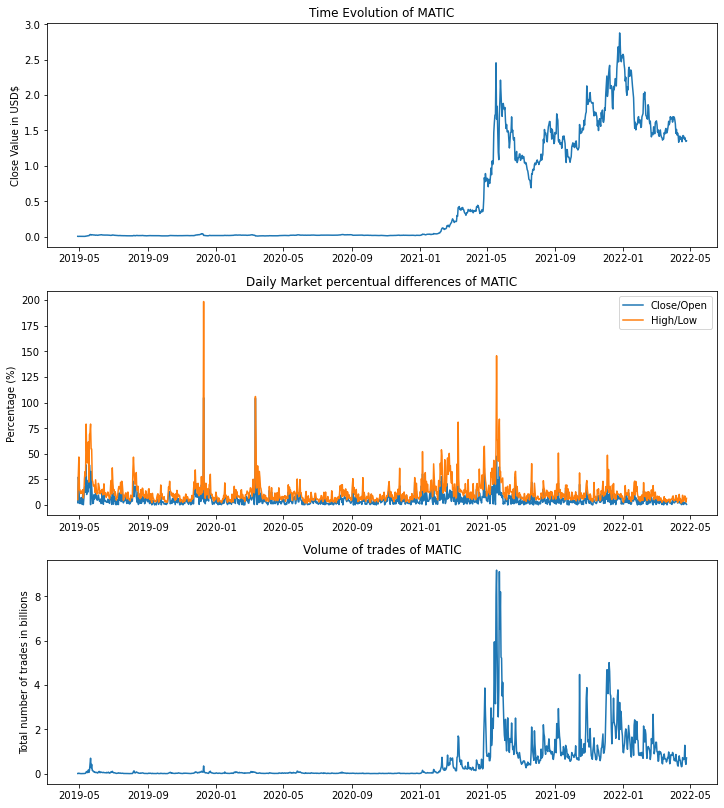

In [13]:
coin_name = plot_coinValue(df)

In [14]:
#FILTER DATASET
df = df.loc[df['Date']>= '2021-07-01']
df

,Date,MATIC-USD_ADJCLOSE,MATIC-USD_CLOSE,MATIC-USD_HIGH,MATIC-USD_LOW,MATIC-USD_OPEN,MATIC-USD_VOLUME,pctDiff_CloseOpen,pctDiff_HighLow
795,2021-07-01,1.077357,1.077357,1.167458,1.064672,1.167458,5.962235e+08,8.363152,9.654247
796,2021-07-02,1.103611,1.103611,1.109534,1.044572,1.074200,4.836585e+08,2.664975,6.219009
797,2021-07-03,1.118638,1.118638,1.145669,1.080955,1.102771,4.238340e+08,1.418421,5.986739
798,2021-07-04,1.147865,1.147865,1.178456,1.095695,1.117961,5.104764e+08,2.605185,7.553282
799,2021-07-05,1.101610,1.101610,1.149955,1.082397,1.146954,4.860956e+08,4.116168,6.241522
...,...,...,...,...,...,...,...,...,...
1089,2022-04-21,1.379862,1.379862,1.465750,1.368370,1.417712,6.526199e+08,2.743030,7.116490
1090,2022-04-22,1.399139,1.399139,1.496747,1.374800,1.379697,1.281223e+09,1.389575,8.870167
1091,2022-04-23,1.365971,1.365971,1.406944,1.350815,1.399106,5.494467e+08,2.425751,4.155193
1092,2022-04-24,1.344245,1.344245,1.373304,1.335365,1.365753,4.209603e+08,1.600013,2.841092


# Modelling


## <font color='#5D6D7E'>Building LSTM Model</font> <a class="anchor" id="twentysecond-bullet"></a>
  [Back to TOC](#toc)

## Strategy

Create a DF (windowed_df) where the middle columns will correspond to the close values of X days before the target date and the final column will correspond to the close value of the target date. Use these values for prediction and play with the value of X

In [15]:
def get_windowed_df(X, df):
    start_Date = df['Date'] + pd.Timedelta(days=X)
    
    perm = np.zeros((1,X+1))
    
    #Get labels for DataFrame
    j=1
    labels=[]
    
    while j <= X:
        label = 'closeValue_' + str(j) + 'daysBefore'
        labels.append(label)
        
        j+=1
 
    labels.append('closeValue')
    
    for i in range(X,df.shape[0]):
        temp = np.zeros((1,X+1))
        
        #Date for i-th day
        #temp[0,0] = df.iloc[i]['Date']
        
        #Close values for k days before
        for k in range(X):           
            temp[0,k] = df.iloc[i-k-1,2]
            
        #Close value for i-th date
        temp[0,-1] = df.iloc[i,2]
        

        #Add values to the permanent frame
        perm = np.vstack((perm,temp))
        
        #Get the array in dataframe form
        windowed_df = pd.DataFrame(perm[1:,:], columns = labels)
        
    return windowed_df

In [16]:
#Get the dataframe and append the dates
windowed_df = get_windowed_df(7, df)
windowed_df['Date'] = df.iloc[7:]['Date'].reset_index(drop=True)
windowed_df

,closeValue_1daysBefore,closeValue_2daysBefore,closeValue_3daysBefore,closeValue_4daysBefore,closeValue_5daysBefore,closeValue_6daysBefore,closeValue_7daysBefore,closeValue,Date
0,1.128411,1.131786,1.101610,1.147865,1.118638,1.103611,1.077357,1.043340,2021-07-08
1,1.043340,1.128411,1.131786,1.101610,1.147865,1.118638,1.103611,1.051329,2021-07-09
2,1.051329,1.043340,1.128411,1.131786,1.101610,1.147865,1.118638,1.029878,2021-07-10
3,1.029878,1.051329,1.043340,1.128411,1.131786,1.101610,1.147865,1.042152,2021-07-11
4,1.042152,1.029878,1.051329,1.043340,1.128411,1.131786,1.101610,0.996988,2021-07-12
...,...,...,...,...,...,...,...,...,...
287,1.417744,1.428176,1.421155,1.340074,1.390932,1.396421,1.372641,1.379862,2022-04-21
288,1.379862,1.417744,1.428176,1.421155,1.340074,1.390932,1.396421,1.399139,2022-04-22
289,1.399139,1.379862,1.417744,1.428176,1.421155,1.340074,1.390932,1.365971,2022-04-23
290,1.365971,1.399139,1.379862,1.417744,1.428176,1.421155,1.340074,1.344245,2022-04-24


In [17]:
#Get the X,y and dates into a numpy array to apply on a model

def windowed_df_to_date_X_y(windowed_dataframe):
    df_as_np = windowed_dataframe.to_numpy()

    dates = df_as_np[:, -1]

    middle_matrix = df_as_np[:, 0:-2]
    X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

    Y = df_as_np[:, -2]

    return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((292,), (292, 7, 1), (292,))

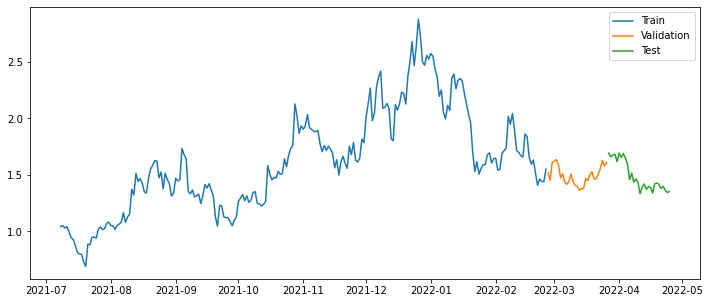

In [18]:
#Partition for train, validation and test

q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

fig,axs = plt.subplots(1, 1, figsize=(12,5))

#Plot the partitions
axs.plot(dates_train, y_train)
axs.plot(dates_val, y_val)
axs.plot(dates_test, y_test)

axs.legend(['Train', 'Validation', 'Test'])

fig.savefig('../analysis/'+coin_name +'_partition'+'.png')

## <font color='#5D6D7E'>Get Best Parameters for LSTM</font> <a class="anchor" id="twentythird-bullet"></a>
  [Back to TOC](#toc)

In [19]:
#!pip install tensorflow

In [20]:
#import os
#os.environ['PYTHONHASHSEED']= '0'
#import numpy as np
#np.random.seed(1)
#import random as rn
#rn.seed(1)
#import tensorflow as tf
#tf.random.set_seed(1)
#
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.optimizers import Adam
#from tensorflow.keras import layers
#from sklearn.metrics import mean_squared_error
#
## Function to create LSTM model and compute the MSE value for the given parameters
#def check_model(X_train, y_train, X_val, y_val, X_test, y_test, learning_rate,epoch,batch):
#    
#    # create model
#    model = Sequential([layers.Input((7, 1)),
#                        layers.LSTM(64),
#                        layers.Dense(32, activation='relu'),
#                        layers.Dense(32, activation='relu'),
#                        layers.Dense(1)])
#    # Compile model
#    model.compile(loss='mse', optimizer=Adam(learning_rate=learning_rate), metrics=['mean_absolute_error'])
#    
#    model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epoch, shuffle=False, batch_size=batch, verbose=2)
#    
#    test_predictions = model.predict(X_test).flatten()
#    
#    LSTM_mse = mean_squared_error(y_test, test_predictions)
#    
#    return LSTM_mse
#
##Function that iterates the different parameters and gets the ones corresponding to the lowest MSE score.
#def search_parameters(batch_size, epochs, learn_rate, X_train, y_train, X_val, y_val, X_test, y_test):
#    
#    best_score = float('inf')
#    
#    for b in batch_size:
#        for e in epochs:
#            for l in learn_rate:
#                print('Batch Size: ' + str(b))
#                print('Number of Epochs: ' + str(e))
#                print('Value of Learning Rate: ' + str(l))
#                try:
#                    mse = check_model(X_train, y_train, X_val, y_val, X_test, y_test,l,e,b)
#                    print('MSE=%.3f' % (mse))
#                    if mse < best_score:
#                        best_score = mse
#                        top_params = [b, e, l]
#                except:
#                    continue
#                    
#    print('Best MSE=%.3f' % (best_score))
#    print('Optimal Batch Size: ' + str(top_params[0]))
#    print('Optimal Number of Epochs: ' + str(top_params[1]))
#    print('Optimal Value of Learning Rate: ' + str(top_params[2]))
#                        
#
## define parameters
#batch_size = [10, 100, 1000]
#epochs = [50, 100]
#learn_rate = np.linspace(0.001,0.1, num=10)
#
#warnings.filterwarnings("ignore")
#search_parameters(batch_size, epochs, learn_rate, X_train, y_train, X_val, y_val, X_test, y_test)

Batch Size: 10
Number of Epochs: 50
Value of Learning Rate: 0.001
Epoch 1/50
24/24 - 1s - loss: 2.1768 - mean_absolute_error: 1.4352 - val_loss: 0.8246 - val_mean_absolute_error: 0.9049 - 1s/epoch - 61ms/step
Epoch 2/50
24/24 - 0s - loss: 0.1438 - mean_absolute_error: 0.3165 - val_loss: 0.0417 - val_mean_absolute_error: 0.1915 - 67ms/epoch - 3ms/step
Epoch 3/50
24/24 - 0s - loss: 0.1682 - mean_absolute_error: 0.3497 - val_loss: 0.3070 - val_mean_absolute_error: 0.5496 - 68ms/epoch - 3ms/step
Epoch 4/50
24/24 - 0s - loss: 0.1884 - mean_absolute_error: 0.3678 - val_loss: 0.1366 - val_mean_absolute_error: 0.3626 - 69ms/epoch - 3ms/step
Epoch 5/50
24/24 - 0s - loss: 0.1177 - mean_absolute_error: 0.2904 - val_loss: 0.1002 - val_mean_absolute_error: 0.3081 - 67ms/epoch - 3ms/step
Epoch 6/50
24/24 - 0s - loss: 0.0849 - mean_absolute_error: 0.2452 - val_loss: 0.0759 - val_mean_absolute_error: 0.2654 - 67ms/epoch - 3ms/step
Epoch 7/50
24/24 - 0s - loss: 0.0631 - mean_absolute_error: 0.2052 - va

Epoch 7/50
24/24 - 0s - loss: 0.2943 - mean_absolute_error: 0.4477 - val_loss: 0.1120 - val_mean_absolute_error: 0.3250 - 66ms/epoch - 3ms/step
Epoch 8/50
24/24 - 0s - loss: 0.2837 - mean_absolute_error: 0.4393 - val_loss: 0.1185 - val_mean_absolute_error: 0.3349 - 65ms/epoch - 3ms/step
Epoch 9/50
24/24 - 0s - loss: 0.2677 - mean_absolute_error: 0.4298 - val_loss: 0.1355 - val_mean_absolute_error: 0.3594 - 66ms/epoch - 3ms/step
Epoch 10/50
24/24 - 0s - loss: 0.2415 - mean_absolute_error: 0.4168 - val_loss: 0.1903 - val_mean_absolute_error: 0.4289 - 66ms/epoch - 3ms/step
Epoch 11/50
24/24 - 0s - loss: 0.2459 - mean_absolute_error: 0.4164 - val_loss: 0.1699 - val_mean_absolute_error: 0.4044 - 65ms/epoch - 3ms/step
Epoch 12/50
24/24 - 0s - loss: 0.1910 - mean_absolute_error: 0.3773 - val_loss: 0.2082 - val_mean_absolute_error: 0.4493 - 66ms/epoch - 3ms/step
Epoch 13/50
24/24 - 0s - loss: 0.1645 - mean_absolute_error: 0.3461 - val_loss: 0.2045 - val_mean_absolute_error: 0.4452 - 66ms/epoch

Epoch 13/50
24/24 - 0s - loss: 0.1688 - mean_absolute_error: 0.3327 - val_loss: 0.2853 - val_mean_absolute_error: 0.5282 - 67ms/epoch - 3ms/step
Epoch 14/50
24/24 - 0s - loss: 0.3594 - mean_absolute_error: 0.4904 - val_loss: 0.0913 - val_mean_absolute_error: 0.2913 - 66ms/epoch - 3ms/step
Epoch 15/50
24/24 - 0s - loss: 0.1980 - mean_absolute_error: 0.3847 - val_loss: 0.2857 - val_mean_absolute_error: 0.5285 - 65ms/epoch - 3ms/step
Epoch 16/50
24/24 - 0s - loss: 0.3158 - mean_absolute_error: 0.4490 - val_loss: 0.0359 - val_mean_absolute_error: 0.1717 - 65ms/epoch - 3ms/step
Epoch 17/50
24/24 - 0s - loss: 0.1113 - mean_absolute_error: 0.2789 - val_loss: 0.1486 - val_mean_absolute_error: 0.3756 - 64ms/epoch - 3ms/step
Epoch 18/50
24/24 - 0s - loss: 0.1439 - mean_absolute_error: 0.3118 - val_loss: 0.1699 - val_mean_absolute_error: 0.4041 - 65ms/epoch - 3ms/step
Epoch 19/50
24/24 - 0s - loss: 0.1507 - mean_absolute_error: 0.3309 - val_loss: 0.1562 - val_mean_absolute_error: 0.3854 - 69ms/ep

24/24 - 0s - loss: 0.2952 - mean_absolute_error: 0.4434 - val_loss: 0.0721 - val_mean_absolute_error: 0.2565 - 67ms/epoch - 3ms/step
Epoch 20/50
24/24 - 0s - loss: 0.2907 - mean_absolute_error: 0.4396 - val_loss: 0.0686 - val_mean_absolute_error: 0.2495 - 67ms/epoch - 3ms/step
Epoch 21/50
24/24 - 0s - loss: 0.2863 - mean_absolute_error: 0.4359 - val_loss: 0.0653 - val_mean_absolute_error: 0.2428 - 67ms/epoch - 3ms/step
Epoch 22/50
24/24 - 0s - loss: 0.2821 - mean_absolute_error: 0.4323 - val_loss: 0.0622 - val_mean_absolute_error: 0.2363 - 65ms/epoch - 3ms/step
Epoch 23/50
24/24 - 0s - loss: 0.2781 - mean_absolute_error: 0.4288 - val_loss: 0.0594 - val_mean_absolute_error: 0.2302 - 66ms/epoch - 3ms/step
Epoch 24/50
24/24 - 0s - loss: 0.2743 - mean_absolute_error: 0.4255 - val_loss: 0.0567 - val_mean_absolute_error: 0.2245 - 66ms/epoch - 3ms/step
Epoch 25/50
24/24 - 0s - loss: 0.2706 - mean_absolute_error: 0.4223 - val_loss: 0.0543 - val_mean_absolute_error: 0.2190 - 66ms/epoch - 3ms/st

24/24 - 0s - loss: 0.2424 - mean_absolute_error: 0.3982 - val_loss: 0.0428 - val_mean_absolute_error: 0.1909 - 66ms/epoch - 3ms/step
Epoch 26/50
24/24 - 0s - loss: 0.2425 - mean_absolute_error: 0.3984 - val_loss: 0.0429 - val_mean_absolute_error: 0.1912 - 65ms/epoch - 3ms/step
Epoch 27/50
24/24 - 0s - loss: 0.2426 - mean_absolute_error: 0.3985 - val_loss: 0.0430 - val_mean_absolute_error: 0.1914 - 65ms/epoch - 3ms/step
Epoch 28/50
24/24 - 0s - loss: 0.2427 - mean_absolute_error: 0.3986 - val_loss: 0.0431 - val_mean_absolute_error: 0.1916 - 66ms/epoch - 3ms/step
Epoch 29/50
24/24 - 0s - loss: 0.2428 - mean_absolute_error: 0.3987 - val_loss: 0.0431 - val_mean_absolute_error: 0.1917 - 64ms/epoch - 3ms/step
Epoch 30/50
24/24 - 0s - loss: 0.2429 - mean_absolute_error: 0.3988 - val_loss: 0.0432 - val_mean_absolute_error: 0.1919 - 66ms/epoch - 3ms/step
Epoch 31/50
24/24 - 0s - loss: 0.2430 - mean_absolute_error: 0.3989 - val_loss: 0.0432 - val_mean_absolute_error: 0.1921 - 64ms/epoch - 3ms/st

Epoch 26/50
24/24 - 0s - loss: 0.2474 - mean_absolute_error: 0.4030 - val_loss: 0.0464 - val_mean_absolute_error: 0.2000 - 70ms/epoch - 3ms/step
Epoch 27/50
24/24 - 0s - loss: 0.2477 - mean_absolute_error: 0.4033 - val_loss: 0.0466 - val_mean_absolute_error: 0.2006 - 70ms/epoch - 3ms/step
Epoch 28/50
24/24 - 0s - loss: 0.2481 - mean_absolute_error: 0.4036 - val_loss: 0.0468 - val_mean_absolute_error: 0.2012 - 70ms/epoch - 3ms/step
Epoch 29/50
24/24 - 0s - loss: 0.2484 - mean_absolute_error: 0.4039 - val_loss: 0.0471 - val_mean_absolute_error: 0.2017 - 69ms/epoch - 3ms/step
Epoch 30/50
24/24 - 0s - loss: 0.2487 - mean_absolute_error: 0.4042 - val_loss: 0.0473 - val_mean_absolute_error: 0.2022 - 68ms/epoch - 3ms/step
Epoch 31/50
24/24 - 0s - loss: 0.2490 - mean_absolute_error: 0.4045 - val_loss: 0.0475 - val_mean_absolute_error: 0.2028 - 68ms/epoch - 3ms/step
Epoch 32/50
24/24 - 0s - loss: 0.2493 - mean_absolute_error: 0.4047 - val_loss: 0.0477 - val_mean_absolute_error: 0.2032 - 66ms/ep

Epoch 27/50
24/24 - 0s - loss: 0.2552 - mean_absolute_error: 0.4100 - val_loss: 0.0534 - val_mean_absolute_error: 0.2169 - 67ms/epoch - 3ms/step
Epoch 28/50
24/24 - 0s - loss: 0.2573 - mean_absolute_error: 0.4122 - val_loss: 0.0537 - val_mean_absolute_error: 0.2175 - 66ms/epoch - 3ms/step
Epoch 29/50
24/24 - 0s - loss: 0.2579 - mean_absolute_error: 0.4127 - val_loss: 0.0537 - val_mean_absolute_error: 0.2176 - 66ms/epoch - 3ms/step
Epoch 30/50
24/24 - 0s - loss: 0.2580 - mean_absolute_error: 0.4128 - val_loss: 0.0541 - val_mean_absolute_error: 0.2185 - 67ms/epoch - 3ms/step
Epoch 31/50
24/24 - 0s - loss: 0.2585 - mean_absolute_error: 0.4132 - val_loss: 0.0544 - val_mean_absolute_error: 0.2191 - 65ms/epoch - 3ms/step
Epoch 32/50
24/24 - 0s - loss: 0.2588 - mean_absolute_error: 0.4136 - val_loss: 0.0546 - val_mean_absolute_error: 0.2197 - 66ms/epoch - 3ms/step
Epoch 33/50
24/24 - 0s - loss: 0.2592 - mean_absolute_error: 0.4139 - val_loss: 0.0549 - val_mean_absolute_error: 0.2203 - 66ms/ep

Epoch 33/50
24/24 - 0s - loss: 0.2426 - mean_absolute_error: 0.3984 - val_loss: 0.0429 - val_mean_absolute_error: 0.1912 - 67ms/epoch - 3ms/step
Epoch 34/50
24/24 - 0s - loss: 0.2430 - mean_absolute_error: 0.3988 - val_loss: 0.0433 - val_mean_absolute_error: 0.1922 - 67ms/epoch - 3ms/step
Epoch 35/50
24/24 - 0s - loss: 0.2434 - mean_absolute_error: 0.3992 - val_loss: 0.0437 - val_mean_absolute_error: 0.1932 - 70ms/epoch - 3ms/step
Epoch 36/50
24/24 - 0s - loss: 0.2440 - mean_absolute_error: 0.3997 - val_loss: 0.0441 - val_mean_absolute_error: 0.1943 - 74ms/epoch - 3ms/step
Epoch 37/50
24/24 - 0s - loss: 0.2446 - mean_absolute_error: 0.4003 - val_loss: 0.0446 - val_mean_absolute_error: 0.1954 - 76ms/epoch - 3ms/step
Epoch 38/50
24/24 - 0s - loss: 0.2452 - mean_absolute_error: 0.4009 - val_loss: 0.0450 - val_mean_absolute_error: 0.1965 - 72ms/epoch - 3ms/step
Epoch 39/50
24/24 - 0s - loss: 0.2458 - mean_absolute_error: 0.4014 - val_loss: 0.0454 - val_mean_absolute_error: 0.1977 - 73ms/ep

Epoch 39/50
24/24 - 0s - loss: 0.2773 - mean_absolute_error: 0.4304 - val_loss: 0.0696 - val_mean_absolute_error: 0.2514 - 65ms/epoch - 3ms/step
Epoch 40/50
24/24 - 0s - loss: 0.2778 - mean_absolute_error: 0.4309 - val_loss: 0.0700 - val_mean_absolute_error: 0.2523 - 65ms/epoch - 3ms/step
Epoch 41/50
24/24 - 0s - loss: 0.2783 - mean_absolute_error: 0.4313 - val_loss: 0.0704 - val_mean_absolute_error: 0.2531 - 65ms/epoch - 3ms/step
Epoch 42/50
24/24 - 0s - loss: 0.2788 - mean_absolute_error: 0.4318 - val_loss: 0.0708 - val_mean_absolute_error: 0.2539 - 65ms/epoch - 3ms/step
Epoch 43/50
24/24 - 0s - loss: 0.2793 - mean_absolute_error: 0.4322 - val_loss: 0.0712 - val_mean_absolute_error: 0.2546 - 66ms/epoch - 3ms/step
Epoch 44/50
24/24 - 0s - loss: 0.2797 - mean_absolute_error: 0.4326 - val_loss: 0.0716 - val_mean_absolute_error: 0.2554 - 71ms/epoch - 3ms/step
Epoch 45/50
24/24 - 0s - loss: 0.2801 - mean_absolute_error: 0.4330 - val_loss: 0.0719 - val_mean_absolute_error: 0.2561 - 69ms/ep

24/24 - 0s - loss: 0.2943 - mean_absolute_error: 0.4454 - val_loss: 0.0847 - val_mean_absolute_error: 0.2799 - 67ms/epoch - 3ms/step
Epoch 46/50
24/24 - 0s - loss: 0.2947 - mean_absolute_error: 0.4457 - val_loss: 0.0850 - val_mean_absolute_error: 0.2805 - 68ms/epoch - 3ms/step
Epoch 47/50
24/24 - 0s - loss: 0.2951 - mean_absolute_error: 0.4460 - val_loss: 0.0854 - val_mean_absolute_error: 0.2811 - 67ms/epoch - 3ms/step
Epoch 48/50
24/24 - 0s - loss: 0.2954 - mean_absolute_error: 0.4463 - val_loss: 0.0857 - val_mean_absolute_error: 0.2816 - 68ms/epoch - 3ms/step
Epoch 49/50
24/24 - 0s - loss: 0.2957 - mean_absolute_error: 0.4466 - val_loss: 0.0860 - val_mean_absolute_error: 0.2821 - 70ms/epoch - 3ms/step
Epoch 50/50
24/24 - 0s - loss: 0.2960 - mean_absolute_error: 0.4468 - val_loss: 0.0863 - val_mean_absolute_error: 0.2827 - 69ms/epoch - 3ms/step
MSE=0.099
Batch Size: 10
Number of Epochs: 100
Value of Learning Rate: 0.001
Epoch 1/100
24/24 - 2s - loss: 0.6545 - mean_absolute_error: 0.75

Epoch 51/100
24/24 - 0s - loss: 0.0408 - mean_absolute_error: 0.1567 - val_loss: 0.0210 - val_mean_absolute_error: 0.1250 - 66ms/epoch - 3ms/step
Epoch 52/100
24/24 - 0s - loss: 0.0406 - mean_absolute_error: 0.1562 - val_loss: 0.0207 - val_mean_absolute_error: 0.1241 - 65ms/epoch - 3ms/step
Epoch 53/100
24/24 - 0s - loss: 0.0404 - mean_absolute_error: 0.1557 - val_loss: 0.0205 - val_mean_absolute_error: 0.1232 - 66ms/epoch - 3ms/step
Epoch 54/100
24/24 - 0s - loss: 0.0401 - mean_absolute_error: 0.1552 - val_loss: 0.0203 - val_mean_absolute_error: 0.1224 - 65ms/epoch - 3ms/step
Epoch 55/100
24/24 - 0s - loss: 0.0400 - mean_absolute_error: 0.1549 - val_loss: 0.0203 - val_mean_absolute_error: 0.1225 - 66ms/epoch - 3ms/step
Epoch 56/100
24/24 - 0s - loss: 0.0397 - mean_absolute_error: 0.1544 - val_loss: 0.0199 - val_mean_absolute_error: 0.1210 - 65ms/epoch - 3ms/step
Epoch 57/100
24/24 - 0s - loss: 0.0394 - mean_absolute_error: 0.1537 - val_loss: 0.0197 - val_mean_absolute_error: 0.1204 - 

Epoch 7/100
24/24 - 0s - loss: 0.3299 - mean_absolute_error: 0.4966 - val_loss: 0.3358 - val_mean_absolute_error: 0.5739 - 77ms/epoch - 3ms/step
Epoch 8/100
24/24 - 0s - loss: 0.3940 - mean_absolute_error: 0.4924 - val_loss: 0.1619 - val_mean_absolute_error: 0.3942 - 77ms/epoch - 3ms/step
Epoch 9/100
24/24 - 0s - loss: 0.3101 - mean_absolute_error: 0.4576 - val_loss: 0.0974 - val_mean_absolute_error: 0.3015 - 67ms/epoch - 3ms/step
Epoch 10/100
24/24 - 0s - loss: 0.2553 - mean_absolute_error: 0.4177 - val_loss: 0.1160 - val_mean_absolute_error: 0.3308 - 73ms/epoch - 3ms/step
Epoch 11/100
24/24 - 0s - loss: 0.2279 - mean_absolute_error: 0.4057 - val_loss: 0.1951 - val_mean_absolute_error: 0.4340 - 67ms/epoch - 3ms/step
Epoch 12/100
24/24 - 0s - loss: 0.2136 - mean_absolute_error: 0.3922 - val_loss: 0.2042 - val_mean_absolute_error: 0.4442 - 68ms/epoch - 3ms/step
Epoch 13/100
24/24 - 0s - loss: 0.1759 - mean_absolute_error: 0.3587 - val_loss: 0.1806 - val_mean_absolute_error: 0.4164 - 66m

Epoch 64/100
24/24 - 0s - loss: 0.0352 - mean_absolute_error: 0.1480 - val_loss: 0.0245 - val_mean_absolute_error: 0.1423 - 68ms/epoch - 3ms/step
Epoch 65/100
24/24 - 0s - loss: 0.0377 - mean_absolute_error: 0.1542 - val_loss: 0.0305 - val_mean_absolute_error: 0.1617 - 65ms/epoch - 3ms/step
Epoch 66/100
24/24 - 0s - loss: 0.0441 - mean_absolute_error: 0.1695 - val_loss: 0.0394 - val_mean_absolute_error: 0.1871 - 66ms/epoch - 3ms/step
Epoch 67/100
24/24 - 0s - loss: 0.0608 - mean_absolute_error: 0.2057 - val_loss: 0.0422 - val_mean_absolute_error: 0.1946 - 67ms/epoch - 3ms/step
Epoch 68/100
24/24 - 0s - loss: 0.0610 - mean_absolute_error: 0.2013 - val_loss: 0.0463 - val_mean_absolute_error: 0.2054 - 66ms/epoch - 3ms/step
Epoch 69/100
24/24 - 0s - loss: 0.0362 - mean_absolute_error: 0.1510 - val_loss: 0.0119 - val_mean_absolute_error: 0.0934 - 66ms/epoch - 3ms/step
Epoch 70/100
24/24 - 0s - loss: 0.0409 - mean_absolute_error: 0.1584 - val_loss: 0.0107 - val_mean_absolute_error: 0.0866 - 

Epoch 20/100
24/24 - 0s - loss: 0.1379 - mean_absolute_error: 0.3102 - val_loss: 0.1258 - val_mean_absolute_error: 0.3443 - 68ms/epoch - 3ms/step
Epoch 21/100
24/24 - 0s - loss: 0.1372 - mean_absolute_error: 0.3040 - val_loss: 0.1532 - val_mean_absolute_error: 0.3819 - 66ms/epoch - 3ms/step
Epoch 22/100
24/24 - 0s - loss: 0.1209 - mean_absolute_error: 0.2877 - val_loss: 0.0988 - val_mean_absolute_error: 0.3021 - 67ms/epoch - 3ms/step
Epoch 23/100
24/24 - 0s - loss: 0.1217 - mean_absolute_error: 0.2859 - val_loss: 0.1406 - val_mean_absolute_error: 0.3650 - 68ms/epoch - 3ms/step
Epoch 24/100
24/24 - 0s - loss: 0.1115 - mean_absolute_error: 0.2762 - val_loss: 0.0940 - val_mean_absolute_error: 0.2942 - 65ms/epoch - 3ms/step
Epoch 25/100
24/24 - 0s - loss: 0.1132 - mean_absolute_error: 0.2753 - val_loss: 0.1328 - val_mean_absolute_error: 0.3542 - 66ms/epoch - 3ms/step
Epoch 26/100
24/24 - 0s - loss: 0.1027 - mean_absolute_error: 0.2645 - val_loss: 0.0916 - val_mean_absolute_error: 0.2903 - 

Epoch 77/100
24/24 - 0s - loss: 0.0408 - mean_absolute_error: 0.1636 - val_loss: 0.0474 - val_mean_absolute_error: 0.2090 - 67ms/epoch - 3ms/step
Epoch 78/100
24/24 - 0s - loss: 0.0648 - mean_absolute_error: 0.2161 - val_loss: 0.0572 - val_mean_absolute_error: 0.2314 - 67ms/epoch - 3ms/step
Epoch 79/100
24/24 - 0s - loss: 0.0700 - mean_absolute_error: 0.2216 - val_loss: 0.0399 - val_mean_absolute_error: 0.1914 - 67ms/epoch - 3ms/step
Epoch 80/100
24/24 - 0s - loss: 0.0310 - mean_absolute_error: 0.1391 - val_loss: 0.0077 - val_mean_absolute_error: 0.0743 - 65ms/epoch - 3ms/step
Epoch 81/100
24/24 - 0s - loss: 0.0385 - mean_absolute_error: 0.1532 - val_loss: 0.0186 - val_mean_absolute_error: 0.1248 - 66ms/epoch - 3ms/step
Epoch 82/100
24/24 - 0s - loss: 0.0253 - mean_absolute_error: 0.1241 - val_loss: 0.0166 - val_mean_absolute_error: 0.1145 - 66ms/epoch - 3ms/step
Epoch 83/100
24/24 - 0s - loss: 0.0473 - mean_absolute_error: 0.1757 - val_loss: 0.0354 - val_mean_absolute_error: 0.1795 - 

Epoch 33/100
24/24 - 0s - loss: 0.2324 - mean_absolute_error: 0.3886 - val_loss: 0.0357 - val_mean_absolute_error: 0.1712 - 68ms/epoch - 3ms/step
Epoch 34/100
24/24 - 0s - loss: 0.2321 - mean_absolute_error: 0.3883 - val_loss: 0.0356 - val_mean_absolute_error: 0.1711 - 67ms/epoch - 3ms/step
Epoch 35/100
24/24 - 0s - loss: 0.2319 - mean_absolute_error: 0.3881 - val_loss: 0.0356 - val_mean_absolute_error: 0.1711 - 67ms/epoch - 3ms/step
Epoch 36/100
24/24 - 0s - loss: 0.2317 - mean_absolute_error: 0.3880 - val_loss: 0.0356 - val_mean_absolute_error: 0.1711 - 69ms/epoch - 3ms/step
Epoch 37/100
24/24 - 0s - loss: 0.2316 - mean_absolute_error: 0.3879 - val_loss: 0.0357 - val_mean_absolute_error: 0.1712 - 67ms/epoch - 3ms/step
Epoch 38/100
24/24 - 0s - loss: 0.2315 - mean_absolute_error: 0.3879 - val_loss: 0.0357 - val_mean_absolute_error: 0.1713 - 67ms/epoch - 3ms/step
Epoch 39/100
24/24 - 0s - loss: 0.2315 - mean_absolute_error: 0.3878 - val_loss: 0.0357 - val_mean_absolute_error: 0.1714 - 

Epoch 90/100
24/24 - 0s - loss: 0.2334 - mean_absolute_error: 0.3898 - val_loss: 0.0371 - val_mean_absolute_error: 0.1753 - 67ms/epoch - 3ms/step
Epoch 91/100
24/24 - 0s - loss: 0.2335 - mean_absolute_error: 0.3898 - val_loss: 0.0371 - val_mean_absolute_error: 0.1753 - 68ms/epoch - 3ms/step
Epoch 92/100
24/24 - 0s - loss: 0.2335 - mean_absolute_error: 0.3898 - val_loss: 0.0371 - val_mean_absolute_error: 0.1754 - 67ms/epoch - 3ms/step
Epoch 93/100
24/24 - 0s - loss: 0.2335 - mean_absolute_error: 0.3898 - val_loss: 0.0371 - val_mean_absolute_error: 0.1754 - 67ms/epoch - 3ms/step
Epoch 94/100
24/24 - 0s - loss: 0.2335 - mean_absolute_error: 0.3898 - val_loss: 0.0371 - val_mean_absolute_error: 0.1754 - 68ms/epoch - 3ms/step
Epoch 95/100
24/24 - 0s - loss: 0.2335 - mean_absolute_error: 0.3898 - val_loss: 0.0371 - val_mean_absolute_error: 0.1754 - 69ms/epoch - 3ms/step
Epoch 96/100
24/24 - 0s - loss: 0.2335 - mean_absolute_error: 0.3898 - val_loss: 0.0371 - val_mean_absolute_error: 0.1755 - 

Epoch 46/100
24/24 - 0s - loss: 0.2418 - mean_absolute_error: 0.3977 - val_loss: 0.0424 - val_mean_absolute_error: 0.1900 - 68ms/epoch - 3ms/step
Epoch 47/100
24/24 - 0s - loss: 0.2419 - mean_absolute_error: 0.3978 - val_loss: 0.0425 - val_mean_absolute_error: 0.1901 - 68ms/epoch - 3ms/step
Epoch 48/100
24/24 - 0s - loss: 0.2420 - mean_absolute_error: 0.3979 - val_loss: 0.0426 - val_mean_absolute_error: 0.1903 - 67ms/epoch - 3ms/step
Epoch 49/100
24/24 - 0s - loss: 0.2421 - mean_absolute_error: 0.3980 - val_loss: 0.0426 - val_mean_absolute_error: 0.1905 - 66ms/epoch - 3ms/step
Epoch 50/100
24/24 - 0s - loss: 0.2422 - mean_absolute_error: 0.3981 - val_loss: 0.0427 - val_mean_absolute_error: 0.1906 - 66ms/epoch - 3ms/step
Epoch 51/100
24/24 - 0s - loss: 0.2423 - mean_absolute_error: 0.3982 - val_loss: 0.0428 - val_mean_absolute_error: 0.1908 - 69ms/epoch - 3ms/step
Epoch 52/100
24/24 - 0s - loss: 0.2424 - mean_absolute_error: 0.3982 - val_loss: 0.0428 - val_mean_absolute_error: 0.1909 - 

Epoch 2/100
24/24 - 0s - loss: 0.2665 - mean_absolute_error: 0.4151 - val_loss: 0.0596 - val_mean_absolute_error: 0.2307 - 70ms/epoch - 3ms/step
Epoch 3/100
24/24 - 0s - loss: 0.3635 - mean_absolute_error: 0.5300 - val_loss: 0.3870 - val_mean_absolute_error: 0.6170 - 69ms/epoch - 3ms/step
Epoch 4/100
24/24 - 0s - loss: 0.1892 - mean_absolute_error: 0.3319 - val_loss: 0.1058 - val_mean_absolute_error: 0.3153 - 69ms/epoch - 3ms/step
Epoch 5/100
24/24 - 0s - loss: 0.4718 - mean_absolute_error: 0.5927 - val_loss: 0.0093 - val_mean_absolute_error: 0.0748 - 70ms/epoch - 3ms/step
Epoch 6/100
24/24 - 0s - loss: 0.6921 - mean_absolute_error: 0.7480 - val_loss: 0.8498 - val_mean_absolute_error: 0.9184 - 69ms/epoch - 3ms/step
Epoch 7/100
24/24 - 0s - loss: 0.6052 - mean_absolute_error: 0.6288 - val_loss: 0.0067 - val_mean_absolute_error: 0.0664 - 68ms/epoch - 3ms/step
Epoch 8/100
24/24 - 0s - loss: 0.1893 - mean_absolute_error: 0.3482 - val_loss: 0.0969 - val_mean_absolute_error: 0.3009 - 68ms/ep

Epoch 59/100
24/24 - 0s - loss: 0.2533 - mean_absolute_error: 0.4085 - val_loss: 0.0504 - val_mean_absolute_error: 0.2098 - 69ms/epoch - 3ms/step
Epoch 60/100
24/24 - 0s - loss: 0.2534 - mean_absolute_error: 0.4085 - val_loss: 0.0505 - val_mean_absolute_error: 0.2100 - 69ms/epoch - 3ms/step
Epoch 61/100
24/24 - 0s - loss: 0.2534 - mean_absolute_error: 0.4086 - val_loss: 0.0505 - val_mean_absolute_error: 0.2101 - 69ms/epoch - 3ms/step
Epoch 62/100
24/24 - 0s - loss: 0.2535 - mean_absolute_error: 0.4087 - val_loss: 0.0506 - val_mean_absolute_error: 0.2103 - 69ms/epoch - 3ms/step
Epoch 63/100
24/24 - 0s - loss: 0.2536 - mean_absolute_error: 0.4088 - val_loss: 0.0506 - val_mean_absolute_error: 0.2104 - 70ms/epoch - 3ms/step
Epoch 64/100
24/24 - 0s - loss: 0.2537 - mean_absolute_error: 0.4088 - val_loss: 0.0507 - val_mean_absolute_error: 0.2105 - 70ms/epoch - 3ms/step
Epoch 65/100
24/24 - 0s - loss: 0.2538 - mean_absolute_error: 0.4089 - val_loss: 0.0507 - val_mean_absolute_error: 0.2107 - 

Epoch 15/100
24/24 - 0s - loss: 0.2574 - mean_absolute_error: 0.4123 - val_loss: 0.0538 - val_mean_absolute_error: 0.2177 - 68ms/epoch - 3ms/step
Epoch 16/100
24/24 - 0s - loss: 0.2581 - mean_absolute_error: 0.4129 - val_loss: 0.0543 - val_mean_absolute_error: 0.2188 - 66ms/epoch - 3ms/step
Epoch 17/100
24/24 - 0s - loss: 0.2588 - mean_absolute_error: 0.4135 - val_loss: 0.0547 - val_mean_absolute_error: 0.2199 - 70ms/epoch - 3ms/step
Epoch 18/100
24/24 - 0s - loss: 0.2593 - mean_absolute_error: 0.4140 - val_loss: 0.0551 - val_mean_absolute_error: 0.2208 - 67ms/epoch - 3ms/step
Epoch 19/100
24/24 - 0s - loss: 0.2599 - mean_absolute_error: 0.4145 - val_loss: 0.0555 - val_mean_absolute_error: 0.2216 - 68ms/epoch - 3ms/step
Epoch 20/100
24/24 - 0s - loss: 0.2603 - mean_absolute_error: 0.4150 - val_loss: 0.0558 - val_mean_absolute_error: 0.2224 - 69ms/epoch - 3ms/step
Epoch 21/100
24/24 - 0s - loss: 0.2608 - mean_absolute_error: 0.4154 - val_loss: 0.0561 - val_mean_absolute_error: 0.2231 - 

Epoch 72/100
24/24 - 0s - loss: 0.2668 - mean_absolute_error: 0.4209 - val_loss: 0.0606 - val_mean_absolute_error: 0.2329 - 69ms/epoch - 3ms/step
Epoch 73/100
24/24 - 0s - loss: 0.2668 - mean_absolute_error: 0.4209 - val_loss: 0.0606 - val_mean_absolute_error: 0.2329 - 67ms/epoch - 3ms/step
Epoch 74/100
24/24 - 0s - loss: 0.2668 - mean_absolute_error: 0.4210 - val_loss: 0.0606 - val_mean_absolute_error: 0.2330 - 67ms/epoch - 3ms/step
Epoch 75/100
24/24 - 0s - loss: 0.2668 - mean_absolute_error: 0.4210 - val_loss: 0.0606 - val_mean_absolute_error: 0.2330 - 68ms/epoch - 3ms/step
Epoch 76/100
24/24 - 0s - loss: 0.2669 - mean_absolute_error: 0.4210 - val_loss: 0.0607 - val_mean_absolute_error: 0.2330 - 69ms/epoch - 3ms/step
Epoch 77/100
24/24 - 0s - loss: 0.2669 - mean_absolute_error: 0.4210 - val_loss: 0.0607 - val_mean_absolute_error: 0.2331 - 66ms/epoch - 3ms/step
Epoch 78/100
24/24 - 0s - loss: 0.2669 - mean_absolute_error: 0.4210 - val_loss: 0.0607 - val_mean_absolute_error: 0.2331 - 

Epoch 28/100
24/24 - 0s - loss: 0.2686 - mean_absolute_error: 0.4225 - val_loss: 0.0623 - val_mean_absolute_error: 0.2365 - 70ms/epoch - 3ms/step
Epoch 29/100
24/24 - 0s - loss: 0.2691 - mean_absolute_error: 0.4230 - val_loss: 0.0627 - val_mean_absolute_error: 0.2374 - 69ms/epoch - 3ms/step
Epoch 30/100
24/24 - 0s - loss: 0.2695 - mean_absolute_error: 0.4234 - val_loss: 0.0631 - val_mean_absolute_error: 0.2381 - 68ms/epoch - 3ms/step
Epoch 31/100
24/24 - 0s - loss: 0.2700 - mean_absolute_error: 0.4238 - val_loss: 0.0634 - val_mean_absolute_error: 0.2388 - 67ms/epoch - 3ms/step
Epoch 32/100
24/24 - 0s - loss: 0.2704 - mean_absolute_error: 0.4242 - val_loss: 0.0637 - val_mean_absolute_error: 0.2395 - 68ms/epoch - 3ms/step
Epoch 33/100
24/24 - 0s - loss: 0.2708 - mean_absolute_error: 0.4245 - val_loss: 0.0640 - val_mean_absolute_error: 0.2401 - 70ms/epoch - 3ms/step
Epoch 34/100
24/24 - 0s - loss: 0.2711 - mean_absolute_error: 0.4249 - val_loss: 0.0643 - val_mean_absolute_error: 0.2407 - 

Epoch 85/100
24/24 - 0s - loss: 0.2781 - mean_absolute_error: 0.4312 - val_loss: 0.0700 - val_mean_absolute_error: 0.2522 - 68ms/epoch - 3ms/step
Epoch 86/100
24/24 - 0s - loss: 0.2782 - mean_absolute_error: 0.4312 - val_loss: 0.0700 - val_mean_absolute_error: 0.2522 - 70ms/epoch - 3ms/step
Epoch 87/100
24/24 - 0s - loss: 0.2782 - mean_absolute_error: 0.4312 - val_loss: 0.0700 - val_mean_absolute_error: 0.2523 - 68ms/epoch - 3ms/step
Epoch 88/100
24/24 - 0s - loss: 0.2782 - mean_absolute_error: 0.4313 - val_loss: 0.0700 - val_mean_absolute_error: 0.2524 - 68ms/epoch - 3ms/step
Epoch 89/100
24/24 - 0s - loss: 0.2783 - mean_absolute_error: 0.4313 - val_loss: 0.0701 - val_mean_absolute_error: 0.2524 - 68ms/epoch - 3ms/step
Epoch 90/100
24/24 - 0s - loss: 0.2783 - mean_absolute_error: 0.4313 - val_loss: 0.0701 - val_mean_absolute_error: 0.2525 - 69ms/epoch - 3ms/step
Epoch 91/100
24/24 - 0s - loss: 0.2783 - mean_absolute_error: 0.4314 - val_loss: 0.0701 - val_mean_absolute_error: 0.2525 - 

Epoch 41/100
24/24 - 0s - loss: 0.2472 - mean_absolute_error: 0.4028 - val_loss: 0.0465 - val_mean_absolute_error: 0.2004 - 68ms/epoch - 3ms/step
Epoch 42/100
24/24 - 0s - loss: 0.2480 - mean_absolute_error: 0.4035 - val_loss: 0.0470 - val_mean_absolute_error: 0.2017 - 69ms/epoch - 3ms/step
Epoch 43/100
24/24 - 0s - loss: 0.2487 - mean_absolute_error: 0.4042 - val_loss: 0.0475 - val_mean_absolute_error: 0.2029 - 67ms/epoch - 3ms/step
Epoch 44/100
24/24 - 0s - loss: 0.2494 - mean_absolute_error: 0.4049 - val_loss: 0.0480 - val_mean_absolute_error: 0.2042 - 67ms/epoch - 3ms/step
Epoch 45/100
24/24 - 0s - loss: 0.2502 - mean_absolute_error: 0.4056 - val_loss: 0.0486 - val_mean_absolute_error: 0.2054 - 68ms/epoch - 3ms/step
Epoch 46/100
24/24 - 0s - loss: 0.2509 - mean_absolute_error: 0.4062 - val_loss: 0.0491 - val_mean_absolute_error: 0.2066 - 66ms/epoch - 3ms/step
Epoch 47/100
24/24 - 0s - loss: 0.2516 - mean_absolute_error: 0.4069 - val_loss: 0.0496 - val_mean_absolute_error: 0.2078 - 

Epoch 98/100
24/24 - 0s - loss: 0.2784 - mean_absolute_error: 0.4314 - val_loss: 0.0704 - val_mean_absolute_error: 0.2530 - 68ms/epoch - 3ms/step
Epoch 99/100
24/24 - 0s - loss: 0.2787 - mean_absolute_error: 0.4317 - val_loss: 0.0707 - val_mean_absolute_error: 0.2536 - 67ms/epoch - 3ms/step
Epoch 100/100
24/24 - 0s - loss: 0.2790 - mean_absolute_error: 0.4320 - val_loss: 0.0709 - val_mean_absolute_error: 0.2541 - 67ms/epoch - 3ms/step
MSE=0.084
Batch Size: 10
Number of Epochs: 100
Value of Learning Rate: 0.1
Epoch 1/100
24/24 - 1s - loss: 23.2570 - mean_absolute_error: 2.3084 - val_loss: 0.5291 - val_mean_absolute_error: 0.7230 - 1s/epoch - 59ms/step
Epoch 2/100
24/24 - 0s - loss: 0.2627 - mean_absolute_error: 0.3713 - val_loss: 0.1372 - val_mean_absolute_error: 0.3618 - 68ms/epoch - 3ms/step
Epoch 3/100
24/24 - 0s - loss: 0.3075 - mean_absolute_error: 0.4596 - val_loss: 0.4443 - val_mean_absolute_error: 0.6618 - 67ms/epoch - 3ms/step
Epoch 4/100
24/24 - 0s - loss: 0.2211 - mean_absolu

Epoch 54/100
24/24 - 0s - loss: 0.2754 - mean_absolute_error: 0.4287 - val_loss: 0.0681 - val_mean_absolute_error: 0.2485 - 71ms/epoch - 3ms/step
Epoch 55/100
24/24 - 0s - loss: 0.2761 - mean_absolute_error: 0.4294 - val_loss: 0.0687 - val_mean_absolute_error: 0.2497 - 82ms/epoch - 3ms/step
Epoch 56/100
24/24 - 0s - loss: 0.2768 - mean_absolute_error: 0.4300 - val_loss: 0.0693 - val_mean_absolute_error: 0.2509 - 93ms/epoch - 4ms/step
Epoch 57/100
24/24 - 0s - loss: 0.2775 - mean_absolute_error: 0.4306 - val_loss: 0.0699 - val_mean_absolute_error: 0.2520 - 83ms/epoch - 3ms/step
Epoch 58/100
24/24 - 0s - loss: 0.2781 - mean_absolute_error: 0.4312 - val_loss: 0.0704 - val_mean_absolute_error: 0.2531 - 73ms/epoch - 3ms/step
Epoch 59/100
24/24 - 0s - loss: 0.2788 - mean_absolute_error: 0.4318 - val_loss: 0.0710 - val_mean_absolute_error: 0.2542 - 72ms/epoch - 3ms/step
Epoch 60/100
24/24 - 0s - loss: 0.2794 - mean_absolute_error: 0.4323 - val_loss: 0.0715 - val_mean_absolute_error: 0.2552 - 

Epoch 10/50
3/3 - 0s - loss: 0.0703 - mean_absolute_error: 0.2338 - val_loss: 0.1819 - val_mean_absolute_error: 0.4207 - 28ms/epoch - 9ms/step
Epoch 11/50
3/3 - 0s - loss: 0.1663 - mean_absolute_error: 0.3728 - val_loss: 0.1848 - val_mean_absolute_error: 0.4240 - 26ms/epoch - 9ms/step
Epoch 12/50
3/3 - 0s - loss: 0.1420 - mean_absolute_error: 0.3387 - val_loss: 0.0739 - val_mean_absolute_error: 0.2623 - 26ms/epoch - 9ms/step
Epoch 13/50
3/3 - 0s - loss: 0.0740 - mean_absolute_error: 0.2316 - val_loss: 0.0118 - val_mean_absolute_error: 0.0908 - 27ms/epoch - 9ms/step
Epoch 14/50
3/3 - 0s - loss: 0.0635 - mean_absolute_error: 0.1943 - val_loss: 0.0069 - val_mean_absolute_error: 0.0685 - 26ms/epoch - 9ms/step
Epoch 15/50
3/3 - 0s - loss: 0.0824 - mean_absolute_error: 0.2111 - val_loss: 0.0115 - val_mean_absolute_error: 0.0846 - 26ms/epoch - 9ms/step
Epoch 16/50
3/3 - 0s - loss: 0.0870 - mean_absolute_error: 0.2142 - val_loss: 0.0085 - val_mean_absolute_error: 0.0744 - 26ms/epoch - 9ms/step

Epoch 17/50
3/3 - 0s - loss: 0.0370 - mean_absolute_error: 0.1480 - val_loss: 0.0082 - val_mean_absolute_error: 0.0773 - 27ms/epoch - 9ms/step
Epoch 18/50
3/3 - 0s - loss: 0.0349 - mean_absolute_error: 0.1440 - val_loss: 0.0086 - val_mean_absolute_error: 0.0755 - 27ms/epoch - 9ms/step
Epoch 19/50
3/3 - 0s - loss: 0.0332 - mean_absolute_error: 0.1425 - val_loss: 0.0077 - val_mean_absolute_error: 0.0759 - 27ms/epoch - 9ms/step
Epoch 20/50
3/3 - 0s - loss: 0.0349 - mean_absolute_error: 0.1447 - val_loss: 0.0076 - val_mean_absolute_error: 0.0755 - 28ms/epoch - 9ms/step
Epoch 21/50
3/3 - 0s - loss: 0.0336 - mean_absolute_error: 0.1430 - val_loss: 0.0070 - val_mean_absolute_error: 0.0728 - 27ms/epoch - 9ms/step
Epoch 22/50
3/3 - 0s - loss: 0.0335 - mean_absolute_error: 0.1422 - val_loss: 0.0080 - val_mean_absolute_error: 0.0766 - 29ms/epoch - 10ms/step
Epoch 23/50
3/3 - 0s - loss: 0.0335 - mean_absolute_error: 0.1417 - val_loss: 0.0070 - val_mean_absolute_error: 0.0711 - 26ms/epoch - 9ms/ste

Epoch 24/50
3/3 - 0s - loss: 0.0277 - mean_absolute_error: 0.1260 - val_loss: 0.0054 - val_mean_absolute_error: 0.0623 - 27ms/epoch - 9ms/step
Epoch 25/50
3/3 - 0s - loss: 0.0264 - mean_absolute_error: 0.1226 - val_loss: 0.0051 - val_mean_absolute_error: 0.0617 - 27ms/epoch - 9ms/step
Epoch 26/50
3/3 - 0s - loss: 0.0316 - mean_absolute_error: 0.1351 - val_loss: 0.0050 - val_mean_absolute_error: 0.0615 - 28ms/epoch - 9ms/step
Epoch 27/50
3/3 - 0s - loss: 0.0308 - mean_absolute_error: 0.1306 - val_loss: 0.0051 - val_mean_absolute_error: 0.0622 - 28ms/epoch - 9ms/step
Epoch 28/50
3/3 - 0s - loss: 0.0361 - mean_absolute_error: 0.1427 - val_loss: 0.0127 - val_mean_absolute_error: 0.0940 - 28ms/epoch - 9ms/step
Epoch 29/50
3/3 - 0s - loss: 0.0272 - mean_absolute_error: 0.1294 - val_loss: 0.0063 - val_mean_absolute_error: 0.0656 - 27ms/epoch - 9ms/step
Epoch 30/50
3/3 - 0s - loss: 0.0265 - mean_absolute_error: 0.1251 - val_loss: 0.0055 - val_mean_absolute_error: 0.0623 - 29ms/epoch - 10ms/ste

Epoch 31/50
3/3 - 0s - loss: 0.0287 - mean_absolute_error: 0.1303 - val_loss: 0.0064 - val_mean_absolute_error: 0.0692 - 29ms/epoch - 10ms/step
Epoch 32/50
3/3 - 0s - loss: 0.0282 - mean_absolute_error: 0.1290 - val_loss: 0.0065 - val_mean_absolute_error: 0.0695 - 27ms/epoch - 9ms/step
Epoch 33/50
3/3 - 0s - loss: 0.0275 - mean_absolute_error: 0.1276 - val_loss: 0.0069 - val_mean_absolute_error: 0.0702 - 29ms/epoch - 10ms/step
Epoch 34/50
3/3 - 0s - loss: 0.0273 - mean_absolute_error: 0.1270 - val_loss: 0.0067 - val_mean_absolute_error: 0.0695 - 27ms/epoch - 9ms/step
Epoch 35/50
3/3 - 0s - loss: 0.0269 - mean_absolute_error: 0.1259 - val_loss: 0.0066 - val_mean_absolute_error: 0.0690 - 27ms/epoch - 9ms/step
Epoch 36/50
3/3 - 0s - loss: 0.0267 - mean_absolute_error: 0.1254 - val_loss: 0.0062 - val_mean_absolute_error: 0.0678 - 27ms/epoch - 9ms/step
Epoch 37/50
3/3 - 0s - loss: 0.0264 - mean_absolute_error: 0.1246 - val_loss: 0.0062 - val_mean_absolute_error: 0.0674 - 27ms/epoch - 9ms/st

Epoch 38/50
3/3 - 0s - loss: 0.0374 - mean_absolute_error: 0.1483 - val_loss: 0.0095 - val_mean_absolute_error: 0.0800 - 26ms/epoch - 9ms/step
Epoch 39/50
3/3 - 0s - loss: 0.0369 - mean_absolute_error: 0.1479 - val_loss: 0.0069 - val_mean_absolute_error: 0.0700 - 25ms/epoch - 8ms/step
Epoch 40/50
3/3 - 0s - loss: 0.0395 - mean_absolute_error: 0.1517 - val_loss: 0.0104 - val_mean_absolute_error: 0.0838 - 27ms/epoch - 9ms/step
Epoch 41/50
3/3 - 0s - loss: 0.0344 - mean_absolute_error: 0.1487 - val_loss: 0.0068 - val_mean_absolute_error: 0.0692 - 26ms/epoch - 9ms/step
Epoch 42/50
3/3 - 0s - loss: 0.0329 - mean_absolute_error: 0.1400 - val_loss: 0.0077 - val_mean_absolute_error: 0.0712 - 27ms/epoch - 9ms/step
Epoch 43/50
3/3 - 0s - loss: 0.0322 - mean_absolute_error: 0.1345 - val_loss: 0.0056 - val_mean_absolute_error: 0.0645 - 27ms/epoch - 9ms/step
Epoch 44/50
3/3 - 0s - loss: 0.0281 - mean_absolute_error: 0.1252 - val_loss: 0.0053 - val_mean_absolute_error: 0.0607 - 26ms/epoch - 9ms/step

Epoch 45/50
3/3 - 0s - loss: 0.0245 - mean_absolute_error: 0.1199 - val_loss: 0.0048 - val_mean_absolute_error: 0.0585 - 26ms/epoch - 9ms/step
Epoch 46/50
3/3 - 0s - loss: 0.0214 - mean_absolute_error: 0.1126 - val_loss: 0.0074 - val_mean_absolute_error: 0.0678 - 26ms/epoch - 9ms/step
Epoch 47/50
3/3 - 0s - loss: 0.0223 - mean_absolute_error: 0.1152 - val_loss: 0.0046 - val_mean_absolute_error: 0.0576 - 27ms/epoch - 9ms/step
Epoch 48/50
3/3 - 0s - loss: 0.0301 - mean_absolute_error: 0.1347 - val_loss: 0.0076 - val_mean_absolute_error: 0.0722 - 26ms/epoch - 9ms/step
Epoch 49/50
3/3 - 0s - loss: 0.0239 - mean_absolute_error: 0.1194 - val_loss: 0.0189 - val_mean_absolute_error: 0.1223 - 27ms/epoch - 9ms/step
Epoch 50/50
3/3 - 0s - loss: 0.0590 - mean_absolute_error: 0.2056 - val_loss: 0.0287 - val_mean_absolute_error: 0.1558 - 26ms/epoch - 9ms/step
MSE=0.037
Batch Size: 100
Number of Epochs: 50
Value of Learning Rate: 0.067
Epoch 1/50
3/3 - 1s - loss: 4.2493 - mean_absolute_error: 1.8731 

Epoch 2/50
3/3 - 0s - loss: 23.2025 - mean_absolute_error: 3.7966 - val_loss: 0.0220 - val_mean_absolute_error: 0.1257 - 29ms/epoch - 10ms/step
Epoch 3/50
3/3 - 0s - loss: 0.3794 - mean_absolute_error: 0.4975 - val_loss: 0.0418 - val_mean_absolute_error: 0.1884 - 28ms/epoch - 9ms/step
Epoch 4/50
3/3 - 0s - loss: 1.3299 - mean_absolute_error: 0.9950 - val_loss: 0.0471 - val_mean_absolute_error: 0.2018 - 27ms/epoch - 9ms/step
Epoch 5/50
3/3 - 0s - loss: 0.2207 - mean_absolute_error: 0.4110 - val_loss: 0.0930 - val_mean_absolute_error: 0.2944 - 28ms/epoch - 9ms/step
Epoch 6/50
3/3 - 0s - loss: 0.7436 - mean_absolute_error: 0.7866 - val_loss: 0.0282 - val_mean_absolute_error: 0.1478 - 27ms/epoch - 9ms/step
Epoch 7/50
3/3 - 0s - loss: 0.1654 - mean_absolute_error: 0.3186 - val_loss: 0.5527 - val_mean_absolute_error: 0.7392 - 29ms/epoch - 10ms/step
Epoch 8/50
3/3 - 0s - loss: 0.5657 - mean_absolute_error: 0.6336 - val_loss: 0.0719 - val_mean_absolute_error: 0.2561 - 28ms/epoch - 9ms/step
Epo

Epoch 9/50
3/3 - 0s - loss: 0.0771 - mean_absolute_error: 0.2067 - val_loss: 0.0646 - val_mean_absolute_error: 0.2455 - 29ms/epoch - 10ms/step
Epoch 10/50
3/3 - 0s - loss: 0.0731 - mean_absolute_error: 0.2320 - val_loss: 0.2103 - val_mean_absolute_error: 0.4484 - 28ms/epoch - 9ms/step
Epoch 11/50
3/3 - 0s - loss: 0.3360 - mean_absolute_error: 0.5063 - val_loss: 0.0201 - val_mean_absolute_error: 0.1245 - 28ms/epoch - 9ms/step
Epoch 12/50
3/3 - 0s - loss: 0.1209 - mean_absolute_error: 0.2701 - val_loss: 0.0610 - val_mean_absolute_error: 0.2368 - 27ms/epoch - 9ms/step
Epoch 13/50
3/3 - 0s - loss: 0.2069 - mean_absolute_error: 0.3840 - val_loss: 0.0503 - val_mean_absolute_error: 0.2107 - 28ms/epoch - 9ms/step
Epoch 14/50
3/3 - 0s - loss: 0.1882 - mean_absolute_error: 0.3665 - val_loss: 0.0854 - val_mean_absolute_error: 0.2826 - 28ms/epoch - 9ms/step
Epoch 15/50
3/3 - 0s - loss: 0.1794 - mean_absolute_error: 0.3598 - val_loss: 0.0361 - val_mean_absolute_error: 0.1758 - 29ms/epoch - 10ms/ste

Epoch 16/50
3/3 - 0s - loss: 0.1426 - mean_absolute_error: 0.2964 - val_loss: 0.0757 - val_mean_absolute_error: 0.2628 - 27ms/epoch - 9ms/step
Epoch 17/50
3/3 - 0s - loss: 0.1708 - mean_absolute_error: 0.3472 - val_loss: 0.0549 - val_mean_absolute_error: 0.2196 - 27ms/epoch - 9ms/step
Epoch 18/50
3/3 - 0s - loss: 0.1737 - mean_absolute_error: 0.3409 - val_loss: 0.0095 - val_mean_absolute_error: 0.0852 - 26ms/epoch - 9ms/step
Epoch 19/50
3/3 - 0s - loss: 0.1618 - mean_absolute_error: 0.3180 - val_loss: 0.0100 - val_mean_absolute_error: 0.0871 - 26ms/epoch - 9ms/step
Epoch 20/50
3/3 - 0s - loss: 0.1331 - mean_absolute_error: 0.2854 - val_loss: 0.0391 - val_mean_absolute_error: 0.1796 - 27ms/epoch - 9ms/step
Epoch 21/50
3/3 - 0s - loss: 0.1328 - mean_absolute_error: 0.2992 - val_loss: 0.0392 - val_mean_absolute_error: 0.1798 - 28ms/epoch - 9ms/step
Epoch 22/50
3/3 - 0s - loss: 0.1361 - mean_absolute_error: 0.2990 - val_loss: 0.0129 - val_mean_absolute_error: 0.0972 - 27ms/epoch - 9ms/step

Epoch 23/100
3/3 - 0s - loss: 0.0705 - mean_absolute_error: 0.2210 - val_loss: 0.0369 - val_mean_absolute_error: 0.1787 - 26ms/epoch - 9ms/step
Epoch 24/100
3/3 - 0s - loss: 0.0723 - mean_absolute_error: 0.2263 - val_loss: 0.0334 - val_mean_absolute_error: 0.1685 - 26ms/epoch - 9ms/step
Epoch 25/100
3/3 - 0s - loss: 0.0697 - mean_absolute_error: 0.2199 - val_loss: 0.0223 - val_mean_absolute_error: 0.1314 - 26ms/epoch - 9ms/step
Epoch 26/100
3/3 - 0s - loss: 0.0660 - mean_absolute_error: 0.2081 - val_loss: 0.0132 - val_mean_absolute_error: 0.0976 - 26ms/epoch - 9ms/step
Epoch 27/100
3/3 - 0s - loss: 0.0640 - mean_absolute_error: 0.1979 - val_loss: 0.0091 - val_mean_absolute_error: 0.0794 - 26ms/epoch - 9ms/step
Epoch 28/100
3/3 - 0s - loss: 0.0623 - mean_absolute_error: 0.1906 - val_loss: 0.0084 - val_mean_absolute_error: 0.0762 - 26ms/epoch - 9ms/step
Epoch 29/100
3/3 - 0s - loss: 0.0590 - mean_absolute_error: 0.1851 - val_loss: 0.0101 - val_mean_absolute_error: 0.0836 - 26ms/epoch - 9

Epoch 80/100
3/3 - 0s - loss: 0.0251 - mean_absolute_error: 0.1226 - val_loss: 0.0055 - val_mean_absolute_error: 0.0630 - 30ms/epoch - 10ms/step
Epoch 81/100
3/3 - 0s - loss: 0.0251 - mean_absolute_error: 0.1226 - val_loss: 0.0055 - val_mean_absolute_error: 0.0630 - 25ms/epoch - 8ms/step
Epoch 82/100
3/3 - 0s - loss: 0.0250 - mean_absolute_error: 0.1225 - val_loss: 0.0055 - val_mean_absolute_error: 0.0630 - 25ms/epoch - 8ms/step
Epoch 83/100
3/3 - 0s - loss: 0.0250 - mean_absolute_error: 0.1224 - val_loss: 0.0055 - val_mean_absolute_error: 0.0630 - 28ms/epoch - 9ms/step
Epoch 84/100
3/3 - 0s - loss: 0.0250 - mean_absolute_error: 0.1223 - val_loss: 0.0055 - val_mean_absolute_error: 0.0630 - 29ms/epoch - 10ms/step
Epoch 85/100
3/3 - 0s - loss: 0.0249 - mean_absolute_error: 0.1223 - val_loss: 0.0055 - val_mean_absolute_error: 0.0630 - 27ms/epoch - 9ms/step
Epoch 86/100
3/3 - 0s - loss: 0.0249 - mean_absolute_error: 0.1222 - val_loss: 0.0055 - val_mean_absolute_error: 0.0630 - 28ms/epoch -

Epoch 37/100
3/3 - 0s - loss: 0.0299 - mean_absolute_error: 0.1348 - val_loss: 0.0065 - val_mean_absolute_error: 0.0701 - 29ms/epoch - 10ms/step
Epoch 38/100
3/3 - 0s - loss: 0.0320 - mean_absolute_error: 0.1379 - val_loss: 0.0062 - val_mean_absolute_error: 0.0669 - 31ms/epoch - 10ms/step
Epoch 39/100
3/3 - 0s - loss: 0.0293 - mean_absolute_error: 0.1334 - val_loss: 0.0067 - val_mean_absolute_error: 0.0708 - 27ms/epoch - 9ms/step
Epoch 40/100
3/3 - 0s - loss: 0.0321 - mean_absolute_error: 0.1378 - val_loss: 0.0062 - val_mean_absolute_error: 0.0663 - 26ms/epoch - 9ms/step
Epoch 41/100
3/3 - 0s - loss: 0.0287 - mean_absolute_error: 0.1320 - val_loss: 0.0069 - val_mean_absolute_error: 0.0713 - 27ms/epoch - 9ms/step
Epoch 42/100
3/3 - 0s - loss: 0.0320 - mean_absolute_error: 0.1374 - val_loss: 0.0061 - val_mean_absolute_error: 0.0656 - 27ms/epoch - 9ms/step
Epoch 43/100
3/3 - 0s - loss: 0.0283 - mean_absolute_error: 0.1310 - val_loss: 0.0069 - val_mean_absolute_error: 0.0709 - 26ms/epoch -

Epoch 94/100
3/3 - 0s - loss: 0.0276 - mean_absolute_error: 0.1287 - val_loss: 0.0098 - val_mean_absolute_error: 0.0807 - 27ms/epoch - 9ms/step
Epoch 95/100
3/3 - 0s - loss: 0.0339 - mean_absolute_error: 0.1414 - val_loss: 0.0056 - val_mean_absolute_error: 0.0647 - 28ms/epoch - 9ms/step
Epoch 96/100
3/3 - 0s - loss: 0.0262 - mean_absolute_error: 0.1247 - val_loss: 0.0055 - val_mean_absolute_error: 0.0628 - 27ms/epoch - 9ms/step
Epoch 97/100
3/3 - 0s - loss: 0.0267 - mean_absolute_error: 0.1239 - val_loss: 0.0066 - val_mean_absolute_error: 0.0683 - 27ms/epoch - 9ms/step
Epoch 98/100
3/3 - 0s - loss: 0.0251 - mean_absolute_error: 0.1208 - val_loss: 0.0062 - val_mean_absolute_error: 0.0652 - 27ms/epoch - 9ms/step
Epoch 99/100
3/3 - 0s - loss: 0.0235 - mean_absolute_error: 0.1190 - val_loss: 0.0063 - val_mean_absolute_error: 0.0669 - 26ms/epoch - 9ms/step
Epoch 100/100
3/3 - 0s - loss: 0.0260 - mean_absolute_error: 0.1222 - val_loss: 0.0053 - val_mean_absolute_error: 0.0623 - 26ms/epoch - 

Epoch 51/100
3/3 - 0s - loss: 0.0354 - mean_absolute_error: 0.1511 - val_loss: 0.0201 - val_mean_absolute_error: 0.1232 - 25ms/epoch - 8ms/step
Epoch 52/100
3/3 - 0s - loss: 0.0339 - mean_absolute_error: 0.1462 - val_loss: 0.0049 - val_mean_absolute_error: 0.0618 - 25ms/epoch - 8ms/step
Epoch 53/100
3/3 - 0s - loss: 0.0372 - mean_absolute_error: 0.1474 - val_loss: 0.0233 - val_mean_absolute_error: 0.1361 - 25ms/epoch - 8ms/step
Epoch 54/100
3/3 - 0s - loss: 0.0320 - mean_absolute_error: 0.1443 - val_loss: 0.0059 - val_mean_absolute_error: 0.0646 - 25ms/epoch - 8ms/step
Epoch 55/100
3/3 - 0s - loss: 0.0271 - mean_absolute_error: 0.1258 - val_loss: 0.0088 - val_mean_absolute_error: 0.0756 - 26ms/epoch - 9ms/step
Epoch 56/100
3/3 - 0s - loss: 0.0247 - mean_absolute_error: 0.1198 - val_loss: 0.0060 - val_mean_absolute_error: 0.0646 - 26ms/epoch - 9ms/step
Epoch 57/100
3/3 - 0s - loss: 0.0277 - mean_absolute_error: 0.1258 - val_loss: 0.0167 - val_mean_absolute_error: 0.1106 - 26ms/epoch - 9

Epoch 8/100
3/3 - 0s - loss: 0.1893 - mean_absolute_error: 0.3301 - val_loss: 0.1380 - val_mean_absolute_error: 0.3629 - 26ms/epoch - 9ms/step
Epoch 9/100
3/3 - 0s - loss: 0.2632 - mean_absolute_error: 0.4369 - val_loss: 0.1516 - val_mean_absolute_error: 0.3811 - 28ms/epoch - 9ms/step
Epoch 10/100
3/3 - 0s - loss: 0.2853 - mean_absolute_error: 0.4403 - val_loss: 0.0172 - val_mean_absolute_error: 0.1122 - 27ms/epoch - 9ms/step
Epoch 11/100
3/3 - 0s - loss: 0.2504 - mean_absolute_error: 0.4091 - val_loss: 0.0072 - val_mean_absolute_error: 0.0671 - 26ms/epoch - 9ms/step
Epoch 12/100
3/3 - 0s - loss: 0.2373 - mean_absolute_error: 0.3807 - val_loss: 0.0092 - val_mean_absolute_error: 0.0841 - 26ms/epoch - 9ms/step
Epoch 13/100
3/3 - 0s - loss: 0.1966 - mean_absolute_error: 0.3477 - val_loss: 0.0552 - val_mean_absolute_error: 0.2209 - 26ms/epoch - 9ms/step
Epoch 14/100
3/3 - 0s - loss: 0.2098 - mean_absolute_error: 0.3780 - val_loss: 0.0779 - val_mean_absolute_error: 0.2675 - 27ms/epoch - 9ms

Epoch 65/100
3/3 - 0s - loss: 0.0199 - mean_absolute_error: 0.1077 - val_loss: 0.0041 - val_mean_absolute_error: 0.0545 - 28ms/epoch - 9ms/step
Epoch 66/100
3/3 - 0s - loss: 0.0190 - mean_absolute_error: 0.1050 - val_loss: 0.0041 - val_mean_absolute_error: 0.0528 - 29ms/epoch - 10ms/step
Epoch 67/100
3/3 - 0s - loss: 0.0183 - mean_absolute_error: 0.1030 - val_loss: 0.0040 - val_mean_absolute_error: 0.0522 - 29ms/epoch - 10ms/step
Epoch 68/100
3/3 - 0s - loss: 0.0182 - mean_absolute_error: 0.1027 - val_loss: 0.0038 - val_mean_absolute_error: 0.0521 - 27ms/epoch - 9ms/step
Epoch 69/100
3/3 - 0s - loss: 0.0175 - mean_absolute_error: 0.1006 - val_loss: 0.0039 - val_mean_absolute_error: 0.0509 - 28ms/epoch - 9ms/step
Epoch 70/100
3/3 - 0s - loss: 0.0170 - mean_absolute_error: 0.0996 - val_loss: 0.0037 - val_mean_absolute_error: 0.0502 - 30ms/epoch - 10ms/step
Epoch 71/100
3/3 - 0s - loss: 0.0170 - mean_absolute_error: 0.0993 - val_loss: 0.0036 - val_mean_absolute_error: 0.0511 - 35ms/epoch 

Epoch 22/100
3/3 - 0s - loss: 0.0319 - mean_absolute_error: 0.1411 - val_loss: 0.0065 - val_mean_absolute_error: 0.0686 - 27ms/epoch - 9ms/step
Epoch 23/100
3/3 - 0s - loss: 0.0292 - mean_absolute_error: 0.1354 - val_loss: 0.0068 - val_mean_absolute_error: 0.0700 - 28ms/epoch - 9ms/step
Epoch 24/100
3/3 - 0s - loss: 0.0290 - mean_absolute_error: 0.1367 - val_loss: 0.0070 - val_mean_absolute_error: 0.0707 - 26ms/epoch - 9ms/step
Epoch 25/100
3/3 - 0s - loss: 0.0287 - mean_absolute_error: 0.1336 - val_loss: 0.0066 - val_mean_absolute_error: 0.0692 - 26ms/epoch - 9ms/step
Epoch 26/100
3/3 - 0s - loss: 0.0274 - mean_absolute_error: 0.1314 - val_loss: 0.0074 - val_mean_absolute_error: 0.0724 - 27ms/epoch - 9ms/step
Epoch 27/100
3/3 - 0s - loss: 0.0277 - mean_absolute_error: 0.1311 - val_loss: 0.0074 - val_mean_absolute_error: 0.0722 - 26ms/epoch - 9ms/step
Epoch 28/100
3/3 - 0s - loss: 0.0269 - mean_absolute_error: 0.1295 - val_loss: 0.0070 - val_mean_absolute_error: 0.0703 - 27ms/epoch - 9

Epoch 79/100
3/3 - 0s - loss: 0.0216 - mean_absolute_error: 0.1155 - val_loss: 0.0049 - val_mean_absolute_error: 0.0600 - 27ms/epoch - 9ms/step
Epoch 80/100
3/3 - 0s - loss: 0.0218 - mean_absolute_error: 0.1177 - val_loss: 0.0062 - val_mean_absolute_error: 0.0631 - 26ms/epoch - 9ms/step
Epoch 81/100
3/3 - 0s - loss: 0.0216 - mean_absolute_error: 0.1142 - val_loss: 0.0049 - val_mean_absolute_error: 0.0595 - 27ms/epoch - 9ms/step
Epoch 82/100
3/3 - 0s - loss: 0.0210 - mean_absolute_error: 0.1144 - val_loss: 0.0060 - val_mean_absolute_error: 0.0623 - 27ms/epoch - 9ms/step
Epoch 83/100
3/3 - 0s - loss: 0.0211 - mean_absolute_error: 0.1130 - val_loss: 0.0051 - val_mean_absolute_error: 0.0599 - 27ms/epoch - 9ms/step
Epoch 84/100
3/3 - 0s - loss: 0.0204 - mean_absolute_error: 0.1125 - val_loss: 0.0051 - val_mean_absolute_error: 0.0598 - 28ms/epoch - 9ms/step
Epoch 85/100
3/3 - 0s - loss: 0.0207 - mean_absolute_error: 0.1122 - val_loss: 0.0050 - val_mean_absolute_error: 0.0596 - 25ms/epoch - 8

Epoch 36/100
3/3 - 0s - loss: 0.2436 - mean_absolute_error: 0.4024 - val_loss: 0.0398 - val_mean_absolute_error: 0.1829 - 27ms/epoch - 9ms/step
Epoch 37/100
3/3 - 0s - loss: 0.2420 - mean_absolute_error: 0.4007 - val_loss: 0.0418 - val_mean_absolute_error: 0.1882 - 26ms/epoch - 9ms/step
Epoch 38/100
3/3 - 0s - loss: 0.2426 - mean_absolute_error: 0.4016 - val_loss: 0.0409 - val_mean_absolute_error: 0.1858 - 27ms/epoch - 9ms/step
Epoch 39/100
3/3 - 0s - loss: 0.2457 - mean_absolute_error: 0.4044 - val_loss: 0.0398 - val_mean_absolute_error: 0.1830 - 26ms/epoch - 9ms/step
Epoch 40/100
3/3 - 0s - loss: 0.2427 - mean_absolute_error: 0.4014 - val_loss: 0.0439 - val_mean_absolute_error: 0.1938 - 27ms/epoch - 9ms/step
Epoch 41/100
3/3 - 0s - loss: 0.2442 - mean_absolute_error: 0.4034 - val_loss: 0.0421 - val_mean_absolute_error: 0.1889 - 28ms/epoch - 9ms/step
Epoch 42/100
3/3 - 0s - loss: 0.2447 - mean_absolute_error: 0.4037 - val_loss: 0.0398 - val_mean_absolute_error: 0.1828 - 26ms/epoch - 9

Epoch 93/100
3/3 - 0s - loss: 0.0614 - mean_absolute_error: 0.1998 - val_loss: 0.0168 - val_mean_absolute_error: 0.1023 - 27ms/epoch - 9ms/step
Epoch 94/100
3/3 - 0s - loss: 0.0865 - mean_absolute_error: 0.2176 - val_loss: 0.0453 - val_mean_absolute_error: 0.2013 - 26ms/epoch - 9ms/step
Epoch 95/100
3/3 - 0s - loss: 0.0829 - mean_absolute_error: 0.2171 - val_loss: 0.0790 - val_mean_absolute_error: 0.2726 - 27ms/epoch - 9ms/step
Epoch 96/100
3/3 - 0s - loss: 0.0760 - mean_absolute_error: 0.2079 - val_loss: 0.1035 - val_mean_absolute_error: 0.3066 - 27ms/epoch - 9ms/step
Epoch 97/100
3/3 - 0s - loss: 0.0828 - mean_absolute_error: 0.2343 - val_loss: 0.0449 - val_mean_absolute_error: 0.1999 - 28ms/epoch - 9ms/step
Epoch 98/100
3/3 - 0s - loss: 0.0591 - mean_absolute_error: 0.1954 - val_loss: 0.0067 - val_mean_absolute_error: 0.0710 - 28ms/epoch - 9ms/step
Epoch 99/100
3/3 - 0s - loss: 0.0774 - mean_absolute_error: 0.2215 - val_loss: 0.0050 - val_mean_absolute_error: 0.0607 - 26ms/epoch - 9

Epoch 50/100
3/3 - 0s - loss: 0.0384 - mean_absolute_error: 0.1594 - val_loss: 0.0141 - val_mean_absolute_error: 0.1006 - 25ms/epoch - 8ms/step
Epoch 51/100
3/3 - 0s - loss: 0.0616 - mean_absolute_error: 0.1917 - val_loss: 0.0106 - val_mean_absolute_error: 0.0849 - 26ms/epoch - 9ms/step
Epoch 52/100
3/3 - 0s - loss: 0.0348 - mean_absolute_error: 0.1496 - val_loss: 0.0060 - val_mean_absolute_error: 0.0626 - 26ms/epoch - 9ms/step
Epoch 53/100
3/3 - 0s - loss: 0.0508 - mean_absolute_error: 0.1701 - val_loss: 0.0046 - val_mean_absolute_error: 0.0571 - 25ms/epoch - 8ms/step
Epoch 54/100
3/3 - 0s - loss: 0.0281 - mean_absolute_error: 0.1300 - val_loss: 0.0045 - val_mean_absolute_error: 0.0564 - 26ms/epoch - 9ms/step
Epoch 55/100
3/3 - 0s - loss: 0.0348 - mean_absolute_error: 0.1404 - val_loss: 0.0053 - val_mean_absolute_error: 0.0598 - 26ms/epoch - 9ms/step
Epoch 56/100
3/3 - 0s - loss: 0.0236 - mean_absolute_error: 0.1187 - val_loss: 0.0045 - val_mean_absolute_error: 0.0564 - 26ms/epoch - 9

Epoch 7/100
3/3 - 0s - loss: 0.2498 - mean_absolute_error: 0.3971 - val_loss: 0.6717 - val_mean_absolute_error: 0.8157 - 26ms/epoch - 9ms/step
Epoch 8/100
3/3 - 0s - loss: 0.8993 - mean_absolute_error: 0.8833 - val_loss: 0.0833 - val_mean_absolute_error: 0.2774 - 26ms/epoch - 9ms/step
Epoch 9/100
3/3 - 0s - loss: 0.2808 - mean_absolute_error: 0.3973 - val_loss: 0.2674 - val_mean_absolute_error: 0.5109 - 25ms/epoch - 8ms/step
Epoch 10/100
3/3 - 0s - loss: 0.3312 - mean_absolute_error: 0.4771 - val_loss: 0.0228 - val_mean_absolute_error: 0.1294 - 26ms/epoch - 9ms/step
Epoch 11/100
3/3 - 0s - loss: 0.3115 - mean_absolute_error: 0.4751 - val_loss: 0.0079 - val_mean_absolute_error: 0.0699 - 26ms/epoch - 9ms/step
Epoch 12/100
3/3 - 0s - loss: 0.1887 - mean_absolute_error: 0.3336 - val_loss: 0.1738 - val_mean_absolute_error: 0.4090 - 26ms/epoch - 9ms/step
Epoch 13/100
3/3 - 0s - loss: 0.2673 - mean_absolute_error: 0.4278 - val_loss: 0.0178 - val_mean_absolute_error: 0.1138 - 26ms/epoch - 9ms/

Epoch 64/100
3/3 - 0s - loss: 0.0251 - mean_absolute_error: 0.1253 - val_loss: 0.0168 - val_mean_absolute_error: 0.1125 - 25ms/epoch - 8ms/step
Epoch 65/100
3/3 - 0s - loss: 0.0245 - mean_absolute_error: 0.1217 - val_loss: 0.0091 - val_mean_absolute_error: 0.0773 - 26ms/epoch - 9ms/step
Epoch 66/100
3/3 - 0s - loss: 0.0226 - mean_absolute_error: 0.1155 - val_loss: 0.0054 - val_mean_absolute_error: 0.0584 - 27ms/epoch - 9ms/step
Epoch 67/100
3/3 - 0s - loss: 0.0215 - mean_absolute_error: 0.1137 - val_loss: 0.0090 - val_mean_absolute_error: 0.0763 - 26ms/epoch - 9ms/step
Epoch 68/100
3/3 - 0s - loss: 0.0238 - mean_absolute_error: 0.1183 - val_loss: 0.0040 - val_mean_absolute_error: 0.0527 - 26ms/epoch - 9ms/step
Epoch 69/100
3/3 - 0s - loss: 0.0220 - mean_absolute_error: 0.1160 - val_loss: 0.0075 - val_mean_absolute_error: 0.0687 - 26ms/epoch - 9ms/step
Epoch 70/100
3/3 - 0s - loss: 0.0213 - mean_absolute_error: 0.1130 - val_loss: 0.0067 - val_mean_absolute_error: 0.0645 - 26ms/epoch - 9

Epoch 21/100
3/3 - 0s - loss: 0.0705 - mean_absolute_error: 0.2212 - val_loss: 0.0383 - val_mean_absolute_error: 0.1854 - 27ms/epoch - 9ms/step
Epoch 22/100
3/3 - 0s - loss: 0.0443 - mean_absolute_error: 0.1706 - val_loss: 0.0307 - val_mean_absolute_error: 0.1638 - 26ms/epoch - 9ms/step
Epoch 23/100
3/3 - 0s - loss: 0.0457 - mean_absolute_error: 0.1804 - val_loss: 0.0134 - val_mean_absolute_error: 0.1024 - 26ms/epoch - 9ms/step
Epoch 24/100
3/3 - 0s - loss: 0.0326 - mean_absolute_error: 0.1440 - val_loss: 0.0058 - val_mean_absolute_error: 0.0594 - 27ms/epoch - 9ms/step
Epoch 25/100
3/3 - 0s - loss: 0.0264 - mean_absolute_error: 0.1194 - val_loss: 0.0155 - val_mean_absolute_error: 0.1092 - 26ms/epoch - 9ms/step
Epoch 26/100
3/3 - 0s - loss: 0.0304 - mean_absolute_error: 0.1414 - val_loss: 0.0063 - val_mean_absolute_error: 0.0623 - 26ms/epoch - 9ms/step
Epoch 27/100
3/3 - 0s - loss: 0.0247 - mean_absolute_error: 0.1168 - val_loss: 0.0166 - val_mean_absolute_error: 0.1139 - 27ms/epoch - 9

Epoch 78/100
3/3 - 0s - loss: 0.0150 - mean_absolute_error: 0.0929 - val_loss: 0.0042 - val_mean_absolute_error: 0.0534 - 26ms/epoch - 9ms/step
Epoch 79/100
3/3 - 0s - loss: 0.0163 - mean_absolute_error: 0.0945 - val_loss: 0.0046 - val_mean_absolute_error: 0.0561 - 27ms/epoch - 9ms/step
Epoch 80/100
3/3 - 0s - loss: 0.0150 - mean_absolute_error: 0.0940 - val_loss: 0.0052 - val_mean_absolute_error: 0.0523 - 28ms/epoch - 9ms/step
Epoch 81/100
3/3 - 0s - loss: 0.0157 - mean_absolute_error: 0.0958 - val_loss: 0.0055 - val_mean_absolute_error: 0.0619 - 26ms/epoch - 9ms/step
Epoch 82/100
3/3 - 0s - loss: 0.0199 - mean_absolute_error: 0.1066 - val_loss: 0.0046 - val_mean_absolute_error: 0.0556 - 27ms/epoch - 9ms/step
Epoch 83/100
3/3 - 0s - loss: 0.0166 - mean_absolute_error: 0.1004 - val_loss: 0.0117 - val_mean_absolute_error: 0.0947 - 28ms/epoch - 9ms/step
Epoch 84/100
3/3 - 0s - loss: 0.0195 - mean_absolute_error: 0.1099 - val_loss: 0.0146 - val_mean_absolute_error: 0.1073 - 26ms/epoch - 9

Epoch 35/100
3/3 - 0s - loss: 0.0433 - mean_absolute_error: 0.1661 - val_loss: 0.0195 - val_mean_absolute_error: 0.1167 - 28ms/epoch - 9ms/step
Epoch 36/100
3/3 - 0s - loss: 0.0583 - mean_absolute_error: 0.1870 - val_loss: 0.0100 - val_mean_absolute_error: 0.0804 - 27ms/epoch - 9ms/step
Epoch 37/100
3/3 - 0s - loss: 0.0412 - mean_absolute_error: 0.1619 - val_loss: 0.0299 - val_mean_absolute_error: 0.1514 - 28ms/epoch - 9ms/step
Epoch 38/100
3/3 - 0s - loss: 0.0569 - mean_absolute_error: 0.1853 - val_loss: 0.0090 - val_mean_absolute_error: 0.0768 - 29ms/epoch - 10ms/step
Epoch 39/100
3/3 - 0s - loss: 0.0395 - mean_absolute_error: 0.1584 - val_loss: 0.0248 - val_mean_absolute_error: 0.1354 - 27ms/epoch - 9ms/step
Epoch 40/100
3/3 - 0s - loss: 0.0497 - mean_absolute_error: 0.1721 - val_loss: 0.0073 - val_mean_absolute_error: 0.0745 - 27ms/epoch - 9ms/step
Epoch 41/100
3/3 - 0s - loss: 0.0391 - mean_absolute_error: 0.1564 - val_loss: 0.0148 - val_mean_absolute_error: 0.1006 - 26ms/epoch - 

Epoch 92/100
3/3 - 0s - loss: 0.0198 - mean_absolute_error: 0.1064 - val_loss: 0.0042 - val_mean_absolute_error: 0.0505 - 28ms/epoch - 9ms/step
Epoch 93/100
3/3 - 0s - loss: 0.0195 - mean_absolute_error: 0.1039 - val_loss: 0.0036 - val_mean_absolute_error: 0.0485 - 30ms/epoch - 10ms/step
Epoch 94/100
3/3 - 0s - loss: 0.0182 - mean_absolute_error: 0.1004 - val_loss: 0.0041 - val_mean_absolute_error: 0.0498 - 29ms/epoch - 10ms/step
Epoch 95/100
3/3 - 0s - loss: 0.0175 - mean_absolute_error: 0.0990 - val_loss: 0.0045 - val_mean_absolute_error: 0.0527 - 28ms/epoch - 9ms/step
Epoch 96/100
3/3 - 0s - loss: 0.0173 - mean_absolute_error: 0.0987 - val_loss: 0.0042 - val_mean_absolute_error: 0.0510 - 28ms/epoch - 9ms/step
Epoch 97/100
3/3 - 0s - loss: 0.0170 - mean_absolute_error: 0.0977 - val_loss: 0.0040 - val_mean_absolute_error: 0.0492 - 27ms/epoch - 9ms/step
Epoch 98/100
3/3 - 0s - loss: 0.0169 - mean_absolute_error: 0.0972 - val_loss: 0.0038 - val_mean_absolute_error: 0.0483 - 26ms/epoch -

Epoch 49/50
1/1 - 0s - loss: 0.0376 - mean_absolute_error: 0.1500 - val_loss: 0.0102 - val_mean_absolute_error: 0.0830 - 21ms/epoch - 21ms/step
Epoch 50/50
1/1 - 0s - loss: 0.0371 - mean_absolute_error: 0.1516 - val_loss: 0.0134 - val_mean_absolute_error: 0.0957 - 22ms/epoch - 22ms/step
MSE=0.021
Batch Size: 1000
Number of Epochs: 50
Value of Learning Rate: 0.012
Epoch 1/50
1/1 - 2s - loss: 2.8082 - mean_absolute_error: 1.6144 - val_loss: 1.4092 - val_mean_absolute_error: 1.1845 - 2s/epoch - 2s/step
Epoch 2/50
1/1 - 0s - loss: 1.8266 - mean_absolute_error: 1.2930 - val_loss: 0.1132 - val_mean_absolute_error: 0.3277 - 23ms/epoch - 23ms/step
Epoch 3/50
1/1 - 0s - loss: 0.2178 - mean_absolute_error: 0.3981 - val_loss: 1.5227 - val_mean_absolute_error: 1.2316 - 24ms/epoch - 24ms/step
Epoch 4/50
1/1 - 0s - loss: 1.4201 - mean_absolute_error: 1.1783 - val_loss: 0.1506 - val_mean_absolute_error: 0.3804 - 24ms/epoch - 24ms/step
Epoch 5/50
1/1 - 0s - loss: 0.1408 - mean_absolute_error: 0.3385 -

Epoch 5/50
1/1 - 0s - loss: 0.7875 - mean_absolute_error: 0.8255 - val_loss: 0.3962 - val_mean_absolute_error: 0.6247 - 24ms/epoch - 24ms/step
Epoch 6/50
1/1 - 0s - loss: 0.6316 - mean_absolute_error: 0.7226 - val_loss: 0.0730 - val_mean_absolute_error: 0.2594 - 23ms/epoch - 23ms/step
Epoch 7/50
1/1 - 0s - loss: 0.2326 - mean_absolute_error: 0.3781 - val_loss: 0.1098 - val_mean_absolute_error: 0.3231 - 24ms/epoch - 24ms/step
Epoch 8/50
1/1 - 0s - loss: 0.1366 - mean_absolute_error: 0.3254 - val_loss: 0.4495 - val_mean_absolute_error: 0.6664 - 23ms/epoch - 23ms/step
Epoch 9/50
1/1 - 0s - loss: 0.3942 - mean_absolute_error: 0.5696 - val_loss: 0.1994 - val_mean_absolute_error: 0.4403 - 22ms/epoch - 22ms/step
Epoch 10/50
1/1 - 0s - loss: 0.2055 - mean_absolute_error: 0.4014 - val_loss: 0.0167 - val_mean_absolute_error: 0.1102 - 21ms/epoch - 21ms/step
Epoch 11/50
1/1 - 0s - loss: 0.1074 - mean_absolute_error: 0.2597 - val_loss: 0.0217 - val_mean_absolute_error: 0.1262 - 22ms/epoch - 22ms/st

Epoch 12/50
1/1 - 0s - loss: 0.1181 - mean_absolute_error: 0.3043 - val_loss: 0.0508 - val_mean_absolute_error: 0.2137 - 24ms/epoch - 24ms/step
Epoch 13/50
1/1 - 0s - loss: 0.0708 - mean_absolute_error: 0.2304 - val_loss: 0.1606 - val_mean_absolute_error: 0.3938 - 23ms/epoch - 23ms/step
Epoch 14/50
1/1 - 0s - loss: 0.3388 - mean_absolute_error: 0.5311 - val_loss: 0.1161 - val_mean_absolute_error: 0.3326 - 22ms/epoch - 22ms/step
Epoch 15/50
1/1 - 0s - loss: 0.1376 - mean_absolute_error: 0.3317 - val_loss: 0.1084 - val_mean_absolute_error: 0.3209 - 22ms/epoch - 22ms/step
Epoch 16/50
1/1 - 0s - loss: 0.1424 - mean_absolute_error: 0.3330 - val_loss: 0.0236 - val_mean_absolute_error: 0.1339 - 24ms/epoch - 24ms/step
Epoch 17/50
1/1 - 0s - loss: 0.1332 - mean_absolute_error: 0.2754 - val_loss: 0.0379 - val_mean_absolute_error: 0.1797 - 23ms/epoch - 23ms/step
Epoch 18/50
1/1 - 0s - loss: 0.1735 - mean_absolute_error: 0.3169 - val_loss: 0.0272 - val_mean_absolute_error: 0.1466 - 23ms/epoch - 23

Epoch 19/50
1/1 - 0s - loss: 0.1747 - mean_absolute_error: 0.3311 - val_loss: 0.1032 - val_mean_absolute_error: 0.3111 - 22ms/epoch - 22ms/step
Epoch 20/50
1/1 - 0s - loss: 0.2083 - mean_absolute_error: 0.3867 - val_loss: 0.1869 - val_mean_absolute_error: 0.4249 - 22ms/epoch - 22ms/step
Epoch 21/50
1/1 - 0s - loss: 0.2630 - mean_absolute_error: 0.4395 - val_loss: 0.1145 - val_mean_absolute_error: 0.3290 - 22ms/epoch - 22ms/step
Epoch 22/50
1/1 - 0s - loss: 0.2096 - mean_absolute_error: 0.3891 - val_loss: 0.0229 - val_mean_absolute_error: 0.1295 - 22ms/epoch - 22ms/step
Epoch 23/50
1/1 - 0s - loss: 0.1608 - mean_absolute_error: 0.3218 - val_loss: 0.0085 - val_mean_absolute_error: 0.0733 - 22ms/epoch - 22ms/step
Epoch 24/50
1/1 - 0s - loss: 0.1834 - mean_absolute_error: 0.3317 - val_loss: 0.0232 - val_mean_absolute_error: 0.1306 - 22ms/epoch - 22ms/step
Epoch 25/50
1/1 - 0s - loss: 0.2131 - mean_absolute_error: 0.3568 - val_loss: 0.0166 - val_mean_absolute_error: 0.1046 - 22ms/epoch - 22

Epoch 26/50
1/1 - 0s - loss: 0.2637 - mean_absolute_error: 0.4347 - val_loss: 0.0773 - val_mean_absolute_error: 0.2668 - 24ms/epoch - 24ms/step
Epoch 27/50
1/1 - 0s - loss: 0.2294 - mean_absolute_error: 0.3978 - val_loss: 0.0629 - val_mean_absolute_error: 0.2384 - 22ms/epoch - 22ms/step
Epoch 28/50
1/1 - 0s - loss: 0.2214 - mean_absolute_error: 0.3873 - val_loss: 0.0500 - val_mean_absolute_error: 0.2096 - 23ms/epoch - 23ms/step
Epoch 29/50
1/1 - 0s - loss: 0.2151 - mean_absolute_error: 0.3787 - val_loss: 0.0410 - val_mean_absolute_error: 0.1869 - 22ms/epoch - 22ms/step
Epoch 30/50
1/1 - 0s - loss: 0.2112 - mean_absolute_error: 0.3728 - val_loss: 0.0319 - val_mean_absolute_error: 0.1606 - 22ms/epoch - 22ms/step
Epoch 31/50
1/1 - 0s - loss: 0.2079 - mean_absolute_error: 0.3674 - val_loss: 0.0236 - val_mean_absolute_error: 0.1326 - 23ms/epoch - 23ms/step
Epoch 32/50
1/1 - 0s - loss: 0.2059 - mean_absolute_error: 0.3632 - val_loss: 0.0175 - val_mean_absolute_error: 0.1130 - 23ms/epoch - 23

Epoch 33/50
1/1 - 0s - loss: 0.1269 - mean_absolute_error: 0.3206 - val_loss: 0.0053 - val_mean_absolute_error: 0.0605 - 20ms/epoch - 20ms/step
Epoch 34/50
1/1 - 0s - loss: 0.0440 - mean_absolute_error: 0.1491 - val_loss: 0.0677 - val_mean_absolute_error: 0.2508 - 22ms/epoch - 22ms/step
Epoch 35/50
1/1 - 0s - loss: 0.1045 - mean_absolute_error: 0.2836 - val_loss: 0.0669 - val_mean_absolute_error: 0.2494 - 22ms/epoch - 22ms/step
Epoch 36/50
1/1 - 0s - loss: 0.0686 - mean_absolute_error: 0.2321 - val_loss: 0.0563 - val_mean_absolute_error: 0.2270 - 20ms/epoch - 20ms/step
Epoch 37/50
1/1 - 0s - loss: 0.0635 - mean_absolute_error: 0.2179 - val_loss: 0.0750 - val_mean_absolute_error: 0.2637 - 21ms/epoch - 21ms/step
Epoch 38/50
1/1 - 0s - loss: 0.0939 - mean_absolute_error: 0.2690 - val_loss: 0.0050 - val_mean_absolute_error: 0.0602 - 21ms/epoch - 21ms/step
Epoch 39/50
1/1 - 0s - loss: 0.0306 - mean_absolute_error: 0.1323 - val_loss: 0.0433 - val_mean_absolute_error: 0.1961 - 23ms/epoch - 23

Epoch 40/50
1/1 - 0s - loss: 0.2122 - mean_absolute_error: 0.3783 - val_loss: 0.0132 - val_mean_absolute_error: 0.0987 - 23ms/epoch - 23ms/step
Epoch 41/50
1/1 - 0s - loss: 0.2043 - mean_absolute_error: 0.3588 - val_loss: 0.0064 - val_mean_absolute_error: 0.0667 - 23ms/epoch - 23ms/step
Epoch 42/50
1/1 - 0s - loss: 0.2203 - mean_absolute_error: 0.3675 - val_loss: 0.0065 - val_mean_absolute_error: 0.0681 - 22ms/epoch - 22ms/step
Epoch 43/50
1/1 - 0s - loss: 0.2147 - mean_absolute_error: 0.3636 - val_loss: 0.0212 - val_mean_absolute_error: 0.1245 - 23ms/epoch - 23ms/step
Epoch 44/50
1/1 - 0s - loss: 0.2019 - mean_absolute_error: 0.3591 - val_loss: 0.0575 - val_mean_absolute_error: 0.2261 - 22ms/epoch - 22ms/step
Epoch 45/50
1/1 - 0s - loss: 0.2118 - mean_absolute_error: 0.3784 - val_loss: 0.0614 - val_mean_absolute_error: 0.2347 - 23ms/epoch - 23ms/step
Epoch 46/50
1/1 - 0s - loss: 0.2134 - mean_absolute_error: 0.3808 - val_loss: 0.0283 - val_mean_absolute_error: 0.1482 - 23ms/epoch - 23

Epoch 47/50
1/1 - 0s - loss: 0.0184 - mean_absolute_error: 0.1034 - val_loss: 0.0037 - val_mean_absolute_error: 0.0519 - 23ms/epoch - 23ms/step
Epoch 48/50
1/1 - 0s - loss: 0.0204 - mean_absolute_error: 0.1106 - val_loss: 0.0125 - val_mean_absolute_error: 0.0961 - 22ms/epoch - 22ms/step
Epoch 49/50
1/1 - 0s - loss: 0.0213 - mean_absolute_error: 0.1134 - val_loss: 0.0033 - val_mean_absolute_error: 0.0495 - 22ms/epoch - 22ms/step
Epoch 50/50
1/1 - 0s - loss: 0.0182 - mean_absolute_error: 0.1041 - val_loss: 0.0042 - val_mean_absolute_error: 0.0570 - 22ms/epoch - 22ms/step
MSE=0.006
Batch Size: 1000
Number of Epochs: 50
Value of Learning Rate: 0.1
Epoch 1/50
1/1 - 2s - loss: 2.7889 - mean_absolute_error: 1.6091 - val_loss: 331.8502 - val_mean_absolute_error: 18.2166 - 2s/epoch - 2s/step
Epoch 2/50
1/1 - 0s - loss: 327.6541 - mean_absolute_error: 18.0965 - val_loss: 2.3804 - val_mean_absolute_error: 1.5408 - 23ms/epoch - 23ms/step
Epoch 3/50
1/1 - 0s - loss: 2.9966 - mean_absolute_error: 1.

Epoch 3/100
1/1 - 0s - loss: 2.1922 - mean_absolute_error: 1.4223 - val_loss: 1.5758 - val_mean_absolute_error: 1.2529 - 26ms/epoch - 26ms/step
Epoch 4/100
1/1 - 0s - loss: 2.0198 - mean_absolute_error: 1.3636 - val_loss: 1.4504 - val_mean_absolute_error: 1.2018 - 24ms/epoch - 24ms/step
Epoch 5/100
1/1 - 0s - loss: 1.8647 - mean_absolute_error: 1.3089 - val_loss: 1.3325 - val_mean_absolute_error: 1.1517 - 26ms/epoch - 26ms/step
Epoch 6/100
1/1 - 0s - loss: 1.7207 - mean_absolute_error: 1.2558 - val_loss: 1.2085 - val_mean_absolute_error: 1.0966 - 25ms/epoch - 25ms/step
Epoch 7/100
1/1 - 0s - loss: 1.5676 - mean_absolute_error: 1.1969 - val_loss: 1.0756 - val_mean_absolute_error: 1.0342 - 24ms/epoch - 24ms/step
Epoch 8/100
1/1 - 0s - loss: 1.4039 - mean_absolute_error: 1.1306 - val_loss: 0.9391 - val_mean_absolute_error: 0.9660 - 22ms/epoch - 22ms/step
Epoch 9/100
1/1 - 0s - loss: 1.2357 - mean_absolute_error: 1.0579 - val_loss: 0.7948 - val_mean_absolute_error: 0.8882 - 24ms/epoch - 24

Epoch 60/100
1/1 - 0s - loss: 0.0353 - mean_absolute_error: 0.1458 - val_loss: 0.0071 - val_mean_absolute_error: 0.0702 - 25ms/epoch - 25ms/step
Epoch 61/100
1/1 - 0s - loss: 0.0356 - mean_absolute_error: 0.1454 - val_loss: 0.0064 - val_mean_absolute_error: 0.0674 - 28ms/epoch - 28ms/step
Epoch 62/100
1/1 - 0s - loss: 0.0362 - mean_absolute_error: 0.1456 - val_loss: 0.0061 - val_mean_absolute_error: 0.0660 - 25ms/epoch - 25ms/step
Epoch 63/100
1/1 - 0s - loss: 0.0368 - mean_absolute_error: 0.1458 - val_loss: 0.0059 - val_mean_absolute_error: 0.0658 - 24ms/epoch - 24ms/step
Epoch 64/100
1/1 - 0s - loss: 0.0371 - mean_absolute_error: 0.1461 - val_loss: 0.0059 - val_mean_absolute_error: 0.0658 - 26ms/epoch - 26ms/step
Epoch 65/100
1/1 - 0s - loss: 0.0373 - mean_absolute_error: 0.1461 - val_loss: 0.0059 - val_mean_absolute_error: 0.0658 - 23ms/epoch - 23ms/step
Epoch 66/100
1/1 - 0s - loss: 0.0371 - mean_absolute_error: 0.1458 - val_loss: 0.0060 - val_mean_absolute_error: 0.0659 - 23ms/epo

1/1 - 0s - loss: 0.1777 - mean_absolute_error: 0.3794 - val_loss: 0.0919 - val_mean_absolute_error: 0.2933 - 22ms/epoch - 22ms/step
Epoch 17/100
1/1 - 0s - loss: 0.1063 - mean_absolute_error: 0.2875 - val_loss: 0.0239 - val_mean_absolute_error: 0.1337 - 22ms/epoch - 22ms/step
Epoch 18/100
1/1 - 0s - loss: 0.0705 - mean_absolute_error: 0.2171 - val_loss: 0.0061 - val_mean_absolute_error: 0.0658 - 22ms/epoch - 22ms/step
Epoch 19/100
1/1 - 0s - loss: 0.0804 - mean_absolute_error: 0.2094 - val_loss: 0.0171 - val_mean_absolute_error: 0.1065 - 22ms/epoch - 22ms/step
Epoch 20/100
1/1 - 0s - loss: 0.1105 - mean_absolute_error: 0.2441 - val_loss: 0.0307 - val_mean_absolute_error: 0.1568 - 22ms/epoch - 22ms/step
Epoch 21/100
1/1 - 0s - loss: 0.1334 - mean_absolute_error: 0.2726 - val_loss: 0.0329 - val_mean_absolute_error: 0.1636 - 22ms/epoch - 22ms/step
Epoch 22/100
1/1 - 0s - loss: 0.1354 - mean_absolute_error: 0.2758 - val_loss: 0.0219 - val_mean_absolute_error: 0.1256 - 22ms/epoch - 22ms/ste

Epoch 73/100
1/1 - 0s - loss: 0.0315 - mean_absolute_error: 0.1380 - val_loss: 0.0068 - val_mean_absolute_error: 0.0700 - 23ms/epoch - 23ms/step
Epoch 74/100
1/1 - 0s - loss: 0.0314 - mean_absolute_error: 0.1380 - val_loss: 0.0067 - val_mean_absolute_error: 0.0702 - 23ms/epoch - 23ms/step
Epoch 75/100
1/1 - 0s - loss: 0.0313 - mean_absolute_error: 0.1380 - val_loss: 0.0066 - val_mean_absolute_error: 0.0704 - 22ms/epoch - 22ms/step
Epoch 76/100
1/1 - 0s - loss: 0.0311 - mean_absolute_error: 0.1377 - val_loss: 0.0067 - val_mean_absolute_error: 0.0697 - 24ms/epoch - 24ms/step
Epoch 77/100
1/1 - 0s - loss: 0.0307 - mean_absolute_error: 0.1369 - val_loss: 0.0071 - val_mean_absolute_error: 0.0699 - 22ms/epoch - 22ms/step
Epoch 78/100
1/1 - 0s - loss: 0.0307 - mean_absolute_error: 0.1366 - val_loss: 0.0072 - val_mean_absolute_error: 0.0702 - 23ms/epoch - 23ms/step
Epoch 79/100
1/1 - 0s - loss: 0.0306 - mean_absolute_error: 0.1364 - val_loss: 0.0069 - val_mean_absolute_error: 0.0695 - 23ms/epo

Epoch 29/100
1/1 - 0s - loss: 0.0508 - mean_absolute_error: 0.1837 - val_loss: 0.0090 - val_mean_absolute_error: 0.0765 - 22ms/epoch - 22ms/step
Epoch 30/100
1/1 - 0s - loss: 0.0340 - mean_absolute_error: 0.1454 - val_loss: 0.0128 - val_mean_absolute_error: 0.0926 - 22ms/epoch - 22ms/step
Epoch 31/100
1/1 - 0s - loss: 0.0439 - mean_absolute_error: 0.1633 - val_loss: 0.0196 - val_mean_absolute_error: 0.1182 - 23ms/epoch - 23ms/step
Epoch 32/100
1/1 - 0s - loss: 0.0517 - mean_absolute_error: 0.1794 - val_loss: 0.0102 - val_mean_absolute_error: 0.0827 - 23ms/epoch - 23ms/step
Epoch 33/100
1/1 - 0s - loss: 0.0405 - mean_absolute_error: 0.1554 - val_loss: 0.0094 - val_mean_absolute_error: 0.0781 - 21ms/epoch - 21ms/step
Epoch 34/100
1/1 - 0s - loss: 0.0338 - mean_absolute_error: 0.1441 - val_loss: 0.0254 - val_mean_absolute_error: 0.1360 - 22ms/epoch - 22ms/step
Epoch 35/100
1/1 - 0s - loss: 0.0425 - mean_absolute_error: 0.1650 - val_loss: 0.0279 - val_mean_absolute_error: 0.1449 - 23ms/epo

Epoch 86/100
1/1 - 0s - loss: 0.0250 - mean_absolute_error: 0.1205 - val_loss: 0.0059 - val_mean_absolute_error: 0.0644 - 22ms/epoch - 22ms/step
Epoch 87/100
1/1 - 0s - loss: 0.0248 - mean_absolute_error: 0.1199 - val_loss: 0.0054 - val_mean_absolute_error: 0.0627 - 22ms/epoch - 22ms/step
Epoch 88/100
1/1 - 0s - loss: 0.0246 - mean_absolute_error: 0.1189 - val_loss: 0.0054 - val_mean_absolute_error: 0.0625 - 22ms/epoch - 22ms/step
Epoch 89/100
1/1 - 0s - loss: 0.0244 - mean_absolute_error: 0.1185 - val_loss: 0.0058 - val_mean_absolute_error: 0.0638 - 23ms/epoch - 23ms/step
Epoch 90/100
1/1 - 0s - loss: 0.0242 - mean_absolute_error: 0.1183 - val_loss: 0.0059 - val_mean_absolute_error: 0.0642 - 22ms/epoch - 22ms/step
Epoch 91/100
1/1 - 0s - loss: 0.0240 - mean_absolute_error: 0.1180 - val_loss: 0.0054 - val_mean_absolute_error: 0.0626 - 22ms/epoch - 22ms/step
Epoch 92/100
1/1 - 0s - loss: 0.0238 - mean_absolute_error: 0.1172 - val_loss: 0.0055 - val_mean_absolute_error: 0.0627 - 21ms/epo

1/1 - 0s - loss: 0.0398 - mean_absolute_error: 0.1507 - val_loss: 0.0112 - val_mean_absolute_error: 0.0902 - 21ms/epoch - 21ms/step
Epoch 43/100
1/1 - 0s - loss: 0.0329 - mean_absolute_error: 0.1341 - val_loss: 0.0049 - val_mean_absolute_error: 0.0606 - 21ms/epoch - 21ms/step
Epoch 44/100
1/1 - 0s - loss: 0.0247 - mean_absolute_error: 0.1177 - val_loss: 0.0109 - val_mean_absolute_error: 0.0835 - 22ms/epoch - 22ms/step
Epoch 45/100
1/1 - 0s - loss: 0.0281 - mean_absolute_error: 0.1354 - val_loss: 0.0162 - val_mean_absolute_error: 0.1071 - 22ms/epoch - 22ms/step
Epoch 46/100
1/1 - 0s - loss: 0.0332 - mean_absolute_error: 0.1478 - val_loss: 0.0091 - val_mean_absolute_error: 0.0755 - 21ms/epoch - 21ms/step
Epoch 47/100
1/1 - 0s - loss: 0.0272 - mean_absolute_error: 0.1305 - val_loss: 0.0051 - val_mean_absolute_error: 0.0616 - 21ms/epoch - 21ms/step
Epoch 48/100
1/1 - 0s - loss: 0.0225 - mean_absolute_error: 0.1127 - val_loss: 0.0099 - val_mean_absolute_error: 0.0795 - 21ms/epoch - 21ms/ste

Epoch 99/100
1/1 - 0s - loss: 0.0178 - mean_absolute_error: 0.1016 - val_loss: 0.0045 - val_mean_absolute_error: 0.0596 - 22ms/epoch - 22ms/step
Epoch 100/100
1/1 - 0s - loss: 0.0177 - mean_absolute_error: 0.1015 - val_loss: 0.0046 - val_mean_absolute_error: 0.0599 - 21ms/epoch - 21ms/step
MSE=0.006
Batch Size: 1000
Number of Epochs: 100
Value of Learning Rate: 0.045000000000000005
Epoch 1/100
1/1 - 1s - loss: 3.2541 - mean_absolute_error: 1.7384 - val_loss: 0.3457 - val_mean_absolute_error: 0.5827 - 1s/epoch - 1s/step
Epoch 2/100
1/1 - 0s - loss: 0.5579 - mean_absolute_error: 0.6761 - val_loss: 22.0853 - val_mean_absolute_error: 4.6989 - 21ms/epoch - 21ms/step
Epoch 3/100
1/1 - 0s - loss: 21.0610 - mean_absolute_error: 4.5786 - val_loss: 0.0634 - val_mean_absolute_error: 0.2393 - 22ms/epoch - 22ms/step
Epoch 4/100
1/1 - 0s - loss: 0.0903 - mean_absolute_error: 0.2600 - val_loss: 1.4201 - val_mean_absolute_error: 1.1889 - 22ms/epoch - 22ms/step
Epoch 5/100
1/1 - 0s - loss: 1.8675 - mea

Epoch 55/100
1/1 - 0s - loss: 0.0355 - mean_absolute_error: 0.1458 - val_loss: 0.0089 - val_mean_absolute_error: 0.0779 - 22ms/epoch - 22ms/step
Epoch 56/100
1/1 - 0s - loss: 0.0391 - mean_absolute_error: 0.1538 - val_loss: 0.0077 - val_mean_absolute_error: 0.0748 - 22ms/epoch - 22ms/step
Epoch 57/100
1/1 - 0s - loss: 0.0368 - mean_absolute_error: 0.1494 - val_loss: 0.0074 - val_mean_absolute_error: 0.0711 - 21ms/epoch - 21ms/step
Epoch 58/100
1/1 - 0s - loss: 0.0336 - mean_absolute_error: 0.1434 - val_loss: 0.0131 - val_mean_absolute_error: 0.0930 - 21ms/epoch - 21ms/step
Epoch 59/100
1/1 - 0s - loss: 0.0352 - mean_absolute_error: 0.1482 - val_loss: 0.0165 - val_mean_absolute_error: 0.1044 - 21ms/epoch - 21ms/step
Epoch 60/100
1/1 - 0s - loss: 0.0367 - mean_absolute_error: 0.1517 - val_loss: 0.0120 - val_mean_absolute_error: 0.0888 - 22ms/epoch - 22ms/step
Epoch 61/100
1/1 - 0s - loss: 0.0343 - mean_absolute_error: 0.1455 - val_loss: 0.0072 - val_mean_absolute_error: 0.0706 - 21ms/epo

Epoch 11/100
1/1 - 0s - loss: 0.2797 - mean_absolute_error: 0.4511 - val_loss: 0.0291 - val_mean_absolute_error: 0.1509 - 22ms/epoch - 22ms/step
Epoch 12/100
1/1 - 0s - loss: 0.1968 - mean_absolute_error: 0.3568 - val_loss: 0.0088 - val_mean_absolute_error: 0.0729 - 21ms/epoch - 21ms/step
Epoch 13/100
1/1 - 0s - loss: 0.2272 - mean_absolute_error: 0.3716 - val_loss: 0.0311 - val_mean_absolute_error: 0.1572 - 21ms/epoch - 21ms/step
Epoch 14/100
1/1 - 0s - loss: 0.2765 - mean_absolute_error: 0.4096 - val_loss: 0.0412 - val_mean_absolute_error: 0.1867 - 22ms/epoch - 22ms/step
Epoch 15/100
1/1 - 0s - loss: 0.2935 - mean_absolute_error: 0.4232 - val_loss: 0.0294 - val_mean_absolute_error: 0.1516 - 22ms/epoch - 22ms/step
Epoch 16/100
1/1 - 0s - loss: 0.2720 - mean_absolute_error: 0.4062 - val_loss: 0.0106 - val_mean_absolute_error: 0.0810 - 23ms/epoch - 23ms/step
Epoch 17/100
1/1 - 0s - loss: 0.2304 - mean_absolute_error: 0.3739 - val_loss: 0.0097 - val_mean_absolute_error: 0.0863 - 22ms/epo

Epoch 68/100
1/1 - 0s - loss: 0.0645 - mean_absolute_error: 0.2037 - val_loss: 0.1450 - val_mean_absolute_error: 0.3730 - 22ms/epoch - 22ms/step
Epoch 69/100
1/1 - 0s - loss: 0.0840 - mean_absolute_error: 0.2394 - val_loss: 0.0347 - val_mean_absolute_error: 0.1637 - 23ms/epoch - 23ms/step
Epoch 70/100
1/1 - 0s - loss: 0.0578 - mean_absolute_error: 0.1879 - val_loss: 0.0654 - val_mean_absolute_error: 0.2364 - 21ms/epoch - 21ms/step
Epoch 71/100
1/1 - 0s - loss: 0.0781 - mean_absolute_error: 0.2226 - val_loss: 0.0224 - val_mean_absolute_error: 0.1308 - 22ms/epoch - 22ms/step
Epoch 72/100
1/1 - 0s - loss: 0.0620 - mean_absolute_error: 0.1917 - val_loss: 0.0575 - val_mean_absolute_error: 0.2241 - 22ms/epoch - 22ms/step
Epoch 73/100
1/1 - 0s - loss: 0.0591 - mean_absolute_error: 0.1932 - val_loss: 0.0730 - val_mean_absolute_error: 0.2549 - 22ms/epoch - 22ms/step
Epoch 74/100
1/1 - 0s - loss: 0.0653 - mean_absolute_error: 0.2084 - val_loss: 0.0158 - val_mean_absolute_error: 0.1097 - 21ms/epo

1/1 - 0s - loss: 0.1255 - mean_absolute_error: 0.2727 - val_loss: 0.0073 - val_mean_absolute_error: 0.0744 - 23ms/epoch - 23ms/step
Epoch 25/100
1/1 - 0s - loss: 0.0996 - mean_absolute_error: 0.2444 - val_loss: 0.0376 - val_mean_absolute_error: 0.1752 - 23ms/epoch - 23ms/step
Epoch 26/100
1/1 - 0s - loss: 0.0927 - mean_absolute_error: 0.2537 - val_loss: 0.0233 - val_mean_absolute_error: 0.1296 - 22ms/epoch - 22ms/step
Epoch 27/100
1/1 - 0s - loss: 0.0731 - mean_absolute_error: 0.2211 - val_loss: 0.0141 - val_mean_absolute_error: 0.0937 - 22ms/epoch - 22ms/step
Epoch 28/100
1/1 - 0s - loss: 0.0729 - mean_absolute_error: 0.2038 - val_loss: 0.0081 - val_mean_absolute_error: 0.0776 - 23ms/epoch - 23ms/step
Epoch 29/100
1/1 - 0s - loss: 0.0492 - mean_absolute_error: 0.1712 - val_loss: 0.0376 - val_mean_absolute_error: 0.1719 - 23ms/epoch - 23ms/step
Epoch 30/100
1/1 - 0s - loss: 0.0603 - mean_absolute_error: 0.2029 - val_loss: 0.0131 - val_mean_absolute_error: 0.0919 - 23ms/epoch - 23ms/ste

Epoch 81/100
1/1 - 0s - loss: 0.0265 - mean_absolute_error: 0.1260 - val_loss: 0.0055 - val_mean_absolute_error: 0.0624 - 22ms/epoch - 22ms/step
Epoch 82/100
1/1 - 0s - loss: 0.0260 - mean_absolute_error: 0.1245 - val_loss: 0.0056 - val_mean_absolute_error: 0.0627 - 22ms/epoch - 22ms/step
Epoch 83/100
1/1 - 0s - loss: 0.0257 - mean_absolute_error: 0.1238 - val_loss: 0.0054 - val_mean_absolute_error: 0.0629 - 23ms/epoch - 23ms/step
Epoch 84/100
1/1 - 0s - loss: 0.0255 - mean_absolute_error: 0.1233 - val_loss: 0.0053 - val_mean_absolute_error: 0.0612 - 22ms/epoch - 22ms/step
Epoch 85/100
1/1 - 0s - loss: 0.0250 - mean_absolute_error: 0.1220 - val_loss: 0.0052 - val_mean_absolute_error: 0.0604 - 24ms/epoch - 24ms/step
Epoch 86/100
1/1 - 0s - loss: 0.0246 - mean_absolute_error: 0.1210 - val_loss: 0.0054 - val_mean_absolute_error: 0.0622 - 22ms/epoch - 22ms/step
Epoch 87/100
1/1 - 0s - loss: 0.0244 - mean_absolute_error: 0.1205 - val_loss: 0.0052 - val_mean_absolute_error: 0.0604 - 22ms/epo

Epoch 37/100
1/1 - 0s - loss: 0.1913 - mean_absolute_error: 0.3456 - val_loss: 0.0065 - val_mean_absolute_error: 0.0671 - 24ms/epoch - 24ms/step
Epoch 38/100
1/1 - 0s - loss: 0.2040 - mean_absolute_error: 0.3522 - val_loss: 0.0073 - val_mean_absolute_error: 0.0676 - 24ms/epoch - 24ms/step
Epoch 39/100
1/1 - 0s - loss: 0.2092 - mean_absolute_error: 0.3558 - val_loss: 0.0065 - val_mean_absolute_error: 0.0676 - 25ms/epoch - 25ms/step
Epoch 40/100
1/1 - 0s - loss: 0.1990 - mean_absolute_error: 0.3482 - val_loss: 0.0128 - val_mean_absolute_error: 0.0976 - 24ms/epoch - 24ms/step
Epoch 41/100
1/1 - 0s - loss: 0.1861 - mean_absolute_error: 0.3414 - val_loss: 0.0327 - val_mean_absolute_error: 0.1619 - 23ms/epoch - 23ms/step
Epoch 42/100
1/1 - 0s - loss: 0.1851 - mean_absolute_error: 0.3475 - val_loss: 0.0543 - val_mean_absolute_error: 0.2188 - 26ms/epoch - 26ms/step
Epoch 43/100
1/1 - 0s - loss: 0.1913 - mean_absolute_error: 0.3605 - val_loss: 0.0579 - val_mean_absolute_error: 0.2268 - 27ms/epo

Epoch 94/100
1/1 - 0s - loss: 0.0493 - mean_absolute_error: 0.1734 - val_loss: 0.0113 - val_mean_absolute_error: 0.0914 - 23ms/epoch - 23ms/step
Epoch 95/100
1/1 - 0s - loss: 0.0504 - mean_absolute_error: 0.1749 - val_loss: 0.0123 - val_mean_absolute_error: 0.0923 - 23ms/epoch - 23ms/step
Epoch 96/100
1/1 - 0s - loss: 0.0492 - mean_absolute_error: 0.1753 - val_loss: 0.0135 - val_mean_absolute_error: 0.0941 - 23ms/epoch - 23ms/step
Epoch 97/100
1/1 - 0s - loss: 0.0496 - mean_absolute_error: 0.1764 - val_loss: 0.0106 - val_mean_absolute_error: 0.0907 - 24ms/epoch - 24ms/step
Epoch 98/100
1/1 - 0s - loss: 0.0493 - mean_absolute_error: 0.1740 - val_loss: 0.0105 - val_mean_absolute_error: 0.0905 - 23ms/epoch - 23ms/step
Epoch 99/100
1/1 - 0s - loss: 0.0491 - mean_absolute_error: 0.1739 - val_loss: 0.0130 - val_mean_absolute_error: 0.0930 - 23ms/epoch - 23ms/step
Epoch 100/100
1/1 - 0s - loss: 0.0492 - mean_absolute_error: 0.1758 - val_loss: 0.0121 - val_mean_absolute_error: 0.0913 - 23ms/ep

Epoch 50/100
1/1 - 0s - loss: 0.2058 - mean_absolute_error: 0.3669 - val_loss: 0.1489 - val_mean_absolute_error: 0.3774 - 23ms/epoch - 23ms/step
Epoch 51/100
1/1 - 0s - loss: 0.2663 - mean_absolute_error: 0.4383 - val_loss: 0.1555 - val_mean_absolute_error: 0.3862 - 22ms/epoch - 22ms/step
Epoch 52/100
1/1 - 0s - loss: 0.2703 - mean_absolute_error: 0.4418 - val_loss: 0.0505 - val_mean_absolute_error: 0.2100 - 22ms/epoch - 22ms/step
Epoch 53/100
1/1 - 0s - loss: 0.2090 - mean_absolute_error: 0.3739 - val_loss: 0.0064 - val_mean_absolute_error: 0.0673 - 21ms/epoch - 21ms/step
Epoch 54/100
1/1 - 0s - loss: 0.2163 - mean_absolute_error: 0.3644 - val_loss: 0.0176 - val_mean_absolute_error: 0.1088 - 23ms/epoch - 23ms/step
Epoch 55/100
1/1 - 0s - loss: 0.2544 - mean_absolute_error: 0.3934 - val_loss: 0.0120 - val_mean_absolute_error: 0.0869 - 23ms/epoch - 23ms/step
Epoch 56/100
1/1 - 0s - loss: 0.2410 - mean_absolute_error: 0.3830 - val_loss: 0.0112 - val_mean_absolute_error: 0.0921 - 22ms/epo

Epoch 6/100
1/1 - 0s - loss: 2.5067 - mean_absolute_error: 1.5205 - val_loss: 1.2508 - val_mean_absolute_error: 1.1155 - 22ms/epoch - 22ms/step
Epoch 7/100
1/1 - 0s - loss: 1.7221 - mean_absolute_error: 1.2371 - val_loss: 0.2712 - val_mean_absolute_error: 0.5146 - 22ms/epoch - 22ms/step
Epoch 8/100
1/1 - 0s - loss: 0.6119 - mean_absolute_error: 0.6530 - val_loss: 0.0229 - val_mean_absolute_error: 0.1297 - 22ms/epoch - 22ms/step
Epoch 9/100
1/1 - 0s - loss: 0.2070 - mean_absolute_error: 0.3638 - val_loss: 0.6781 - val_mean_absolute_error: 0.8195 - 21ms/epoch - 21ms/step
Epoch 10/100
1/1 - 0s - loss: 0.6878 - mean_absolute_error: 0.7279 - val_loss: 0.5157 - val_mean_absolute_error: 0.7136 - 26ms/epoch - 26ms/step
Epoch 11/100
1/1 - 0s - loss: 0.5547 - mean_absolute_error: 0.6465 - val_loss: 0.0696 - val_mean_absolute_error: 0.2511 - 23ms/epoch - 23ms/step
Epoch 12/100
1/1 - 0s - loss: 0.2268 - mean_absolute_error: 0.3940 - val_loss: 0.0260 - val_mean_absolute_error: 0.1398 - 22ms/epoch -

Epoch 63/100
1/1 - 0s - loss: 0.1438 - mean_absolute_error: 0.3006 - val_loss: 0.0364 - val_mean_absolute_error: 0.1757 - 24ms/epoch - 24ms/step
Epoch 64/100
1/1 - 0s - loss: 0.1381 - mean_absolute_error: 0.3050 - val_loss: 0.0172 - val_mean_absolute_error: 0.1128 - 23ms/epoch - 23ms/step
Epoch 65/100
1/1 - 0s - loss: 0.1387 - mean_absolute_error: 0.2973 - val_loss: 0.0209 - val_mean_absolute_error: 0.1249 - 23ms/epoch - 23ms/step
Epoch 66/100
1/1 - 0s - loss: 0.1293 - mean_absolute_error: 0.2886 - val_loss: 0.0333 - val_mean_absolute_error: 0.1668 - 24ms/epoch - 24ms/step
Epoch 67/100
1/1 - 0s - loss: 0.1277 - mean_absolute_error: 0.2929 - val_loss: 0.0206 - val_mean_absolute_error: 0.1244 - 24ms/epoch - 24ms/step
Epoch 68/100
1/1 - 0s - loss: 0.1202 - mean_absolute_error: 0.2787 - val_loss: 0.0099 - val_mean_absolute_error: 0.0854 - 23ms/epoch - 23ms/step
Epoch 69/100
1/1 - 0s - loss: 0.1161 - mean_absolute_error: 0.2680 - val_loss: 0.0187 - val_mean_absolute_error: 0.1183 - 22ms/epo

## <font color='#5D6D7E'>Run the LSTM Model and Get Predictions</font> <a class="anchor" id="twentyfourth-bullet"></a>
  [Back to TOC](#toc)

In [25]:
#BEST SOLUTION OF THE MODEL

# MSE=0.003
# Batch Size: 100
# Number of Epochs: 100
# Value of Learning Rate: 0.1

model = Sequential([layers.Input((7, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.1),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, shuffle=False, batch_size=100, verbose=2)

Epoch 1/100
3/3 - 1s - loss: 540.1243 - mean_absolute_error: 15.9373 - val_loss: 1.4869 - val_mean_absolute_error: 1.2170 - 1s/epoch - 487ms/step
Epoch 2/100
3/3 - 0s - loss: 17.0749 - mean_absolute_error: 2.1086 - val_loss: 0.0297 - val_mean_absolute_error: 0.1523 - 29ms/epoch - 10ms/step
Epoch 3/100
3/3 - 0s - loss: 2.6219 - mean_absolute_error: 1.3538 - val_loss: 5.2658 - val_mean_absolute_error: 2.2933 - 29ms/epoch - 10ms/step
Epoch 4/100
3/3 - 0s - loss: 5.6379 - mean_absolute_error: 2.3285 - val_loss: 0.3860 - val_mean_absolute_error: 0.6159 - 28ms/epoch - 9ms/step
Epoch 5/100
3/3 - 0s - loss: 0.4360 - mean_absolute_error: 0.5145 - val_loss: 0.8564 - val_mean_absolute_error: 0.9218 - 28ms/epoch - 9ms/step
Epoch 6/100
3/3 - 0s - loss: 0.9858 - mean_absolute_error: 0.8838 - val_loss: 0.5877 - val_mean_absolute_error: 0.7624 - 27ms/epoch - 9ms/step
Epoch 7/100
3/3 - 0s - loss: 1.2184 - mean_absolute_error: 0.9700 - val_loss: 0.5466 - val_mean_absolute_error: 0.7350 - 28ms/epoch - 9m

Epoch 58/100
3/3 - 0s - loss: 0.0238 - mean_absolute_error: 0.1184 - val_loss: 0.0047 - val_mean_absolute_error: 0.0582 - 27ms/epoch - 9ms/step
Epoch 59/100
3/3 - 0s - loss: 0.0237 - mean_absolute_error: 0.1179 - val_loss: 0.0046 - val_mean_absolute_error: 0.0573 - 28ms/epoch - 9ms/step
Epoch 60/100
3/3 - 0s - loss: 0.0222 - mean_absolute_error: 0.1143 - val_loss: 0.0054 - val_mean_absolute_error: 0.0607 - 28ms/epoch - 9ms/step
Epoch 61/100
3/3 - 0s - loss: 0.0219 - mean_absolute_error: 0.1141 - val_loss: 0.0046 - val_mean_absolute_error: 0.0571 - 27ms/epoch - 9ms/step
Epoch 62/100
3/3 - 0s - loss: 0.0222 - mean_absolute_error: 0.1133 - val_loss: 0.0045 - val_mean_absolute_error: 0.0566 - 27ms/epoch - 9ms/step
Epoch 63/100
3/3 - 0s - loss: 0.0206 - mean_absolute_error: 0.1102 - val_loss: 0.0050 - val_mean_absolute_error: 0.0582 - 26ms/epoch - 9ms/step
Epoch 64/100
3/3 - 0s - loss: 0.0203 - mean_absolute_error: 0.1101 - val_loss: 0.0043 - val_mean_absolute_error: 0.0548 - 26ms/epoch - 9

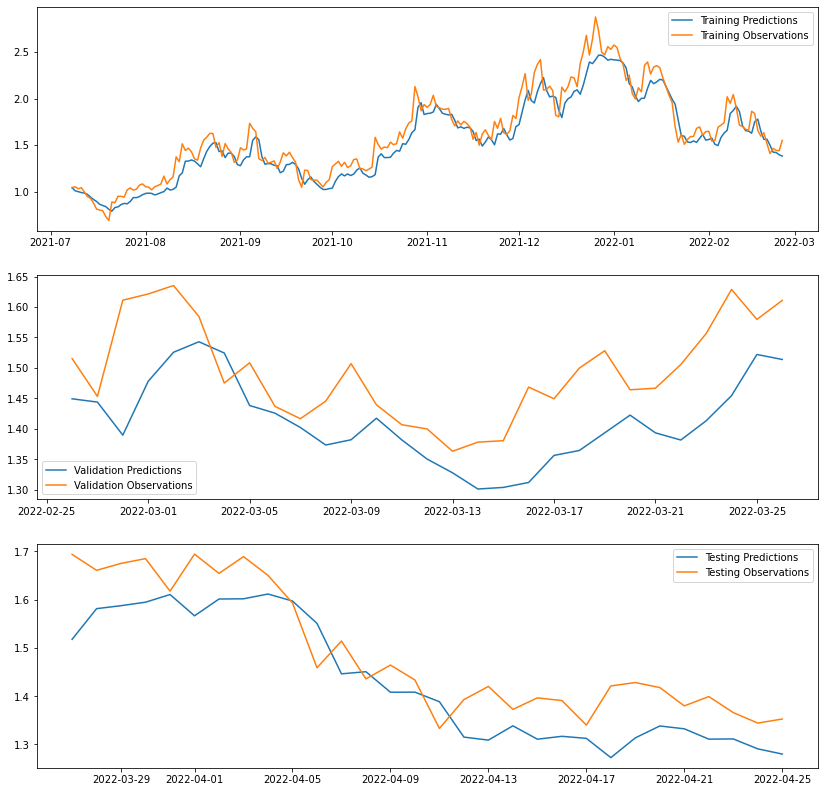

In [26]:
#PREDICT THE VALUES USING THE MODEL
train_predictions = model.predict(X_train).flatten()
val_predictions = model.predict(X_val).flatten()
test_predictions = model.predict(X_test).flatten()


fig,axs = plt.subplots(3, 1, figsize=(14,14))

axs[0].plot(dates_train, train_predictions)
axs[0].plot(dates_train, y_train)
axs[0].legend(['Training Predictions', 'Training Observations'])

axs[1].plot(dates_val, val_predictions)
axs[1].plot(dates_val, y_val)
axs[1].legend(['Validation Predictions', 'Validation Observations'])

axs[2].plot(dates_test, test_predictions)
axs[2].plot(dates_test, y_test)
axs[2].legend(['Testing Predictions', 'Testing Observations'])

plt.savefig('../analysis/LTSM_recursive/'+coin_name +'_modelPredictions'+'.png')

## <font color='#5D6D7E'>Recursive Predictions</font> <a class="anchor" id="twentysixth-bullet"></a>
  [Back to TOC](#toc)

In [27]:
from copy import deepcopy

#Get prediction for future dates recursively based on the previous existing information. Then update the window of days upon
#which the predictions are made

recursive_predictions = []
recursive_dates = np.concatenate([dates_test])

last_window = deepcopy(X_train[-1])

for target_date in recursive_dates:
    next_prediction = model.predict(np.array([last_window])).flatten()
    recursive_predictions.append(next_prediction)
    last_window = np.insert(last_window,0,next_prediction)[:-1]
    

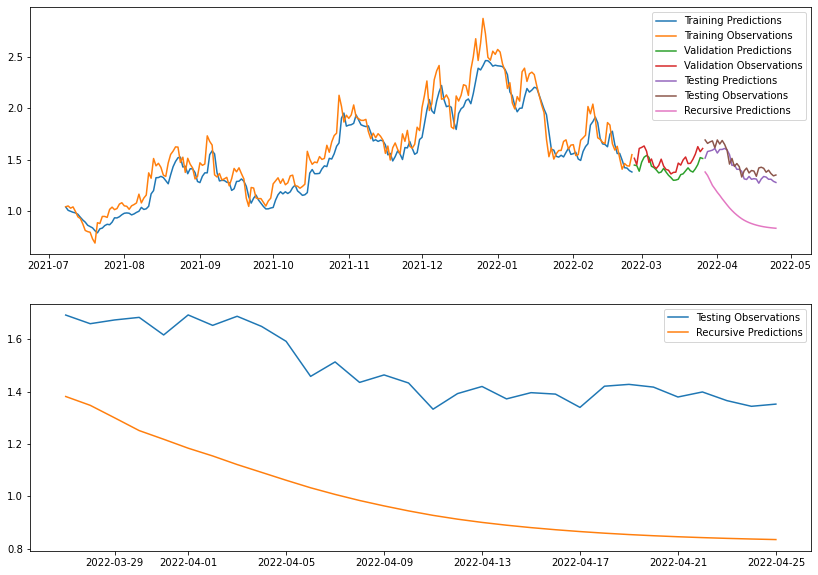

In [28]:
fig,axs = plt.subplots(2, 1, figsize=(14,10))

axs[0].plot(dates_train, train_predictions)
axs[0].plot(dates_train, y_train)
axs[0].plot(dates_val, val_predictions)
axs[0].plot(dates_val, y_val)
axs[0].plot(dates_test, test_predictions)
axs[0].plot(dates_test, y_test)
axs[0].plot(recursive_dates, recursive_predictions)
axs[0].legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])

axs[1].plot(dates_test, y_test)
axs[1].plot(recursive_dates, recursive_predictions)
axs[1].legend(['Testing Observations',
              'Recursive Predictions'])

plt.savefig('../analysis/LTSM_recursive/'+coin_name +'_recursivePredictions'+'.png')